Estações que serão utilizadas (vide análise da quantidade de dados faltantes na planilha):

Rio: 143, 283, 413, 563, 629, 1000580, 1000610, 1000958

Chuva: 143, 283, 413, 511, 514, 563, 629, 1000500, 1000510, 1000868

In [1]:
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import dateparser as dp

# Obtenção dos Dados

# 2018

In [2]:
# Dados de Rio
todas_flu_parte1_2018 = pd.read_csv ('data/Todas Fluviométricas Parte 1 Jan_2018 a Mar_2018.csv')
todas_flu_parte2_2018 = pd.read_csv ('data/Todas Fluviométricas Parte 2 Jan_2018 a Mar_2018.csv')
# Chuva
todas_plu_parte1_2018 = pd.read_csv ('data/Todas Pluviométricas Parte 1 Jan_2018 a Mar_2018.csv')
todas_plu_parte2_2018 = pd.read_csv ('data/Todas Pluviométricas Parte 2 Jan_2018 a Mar_2018.csv')
todas_plu_parte3_2018 = pd.read_csv ('data/Todas Pluviométricas Parte 3 Jan_2018 a Mar_2018.csv')
todas_plu_parte4_2018 = pd.read_csv ('data/Todas Pluviométricas Parte 4 Jan_2018 a Mar_2018.csv')

In [3]:
# Lista de Estações
lista_estacoes_flu_parte1_2018 = todas_flu_parte1_2018['prefixo'].unique()
lista_estacoes_flu_parte2_2018 = todas_flu_parte2_2018['prefixo'].unique()
lista_estacoes_plu_parte1_2018 = todas_plu_parte1_2018['prefixo'].unique()
lista_estacoes_plu_parte2_2018 = todas_plu_parte2_2018['prefixo'].unique()
lista_estacoes_plu_parte3_2018 = todas_plu_parte3_2018['prefixo'].unique()
lista_estacoes_plu_parte4_2018 = todas_plu_parte4_2018['prefixo'].unique()

In [4]:
# Tratar dos horários anômalos
horario_inicial = dp.parse(todas_flu_parte1_2018['intervalo'][0])
horario = horario_inicial
horario_string = horario.strftime("%Y-%m-%d %H:%M:%S UTC")

df_horarios = pd.DataFrame(columns=['intervalo'])
for i in range(12960):
  df_horarios.loc[i] = [horario_string]
  horario = horario + timedelta(minutes=10)
  horario_string = horario.strftime("%Y-%m-%d %H:%M:%S UTC")

horarios_anomalos = []
quantidade_estacoes = len(lista_estacoes_flu_parte1_2018)
for j in range(quantidade_estacoes):
  for i in todas_flu_parte1_2018[todas_flu_parte1_2018['prefixo']==lista_estacoes_flu_parte1_2018[j]].reset_index(drop=True)['intervalo']:
    if i not in df_horarios['intervalo'].values.tolist():
      #print(i)
      horarios_anomalos.append(i)
quantidade_estacoes = len(lista_estacoes_flu_parte2_2018)
for j in range(quantidade_estacoes):
  for i in todas_flu_parte2_2018[todas_flu_parte2_2018['prefixo']==lista_estacoes_flu_parte2_2018[j]].reset_index(drop=True)['intervalo']:
    if i not in df_horarios['intervalo'].values.tolist():
      #print(i)
      horarios_anomalos.append(i)
quantidade_estacoes = len(lista_estacoes_plu_parte1_2018)
for j in range(quantidade_estacoes):
  for i in todas_plu_parte1_2018[todas_plu_parte1_2018['prefixo']==lista_estacoes_plu_parte1_2018[j]].reset_index(drop=True)['intervalo']:
    if i not in df_horarios['intervalo'].values.tolist():
      #print(i)
      horarios_anomalos.append(i)
quantidade_estacoes = len(lista_estacoes_plu_parte2_2018)
for j in range(quantidade_estacoes):
  for i in todas_plu_parte2_2018[todas_plu_parte2_2018['prefixo']==lista_estacoes_plu_parte2_2018[j]].reset_index(drop=True)['intervalo']:
    if i not in df_horarios['intervalo'].values.tolist():
      #print(i)
      horarios_anomalos.append(i)
quantidade_estacoes = len(lista_estacoes_plu_parte3_2018)
for j in range(quantidade_estacoes):
  for i in todas_plu_parte3_2018[todas_plu_parte3_2018['prefixo']==lista_estacoes_plu_parte3_2018[j]].reset_index(drop=True)['intervalo']:
    if i not in df_horarios['intervalo'].values.tolist():
      #print(i)
      horarios_anomalos.append(i)
quantidade_estacoes = len(lista_estacoes_plu_parte4_2018)
for j in range(quantidade_estacoes):
  for i in todas_plu_parte4_2018[todas_plu_parte4_2018['prefixo']==lista_estacoes_plu_parte4_2018[j]].reset_index(drop=True)['intervalo']:
    if i not in df_horarios['intervalo'].values.tolist():
      #print(i)
      horarios_anomalos.append(i)

horarios_anomalos

['2018-03-29 15:22:00 UTC', '2018-03-29 15:22:00 UTC']

In [5]:
# Remoção das linhas com horários anômalos
for i in range(len(horarios_anomalos)):
  todas_flu_parte1_2018 = todas_flu_parte1_2018[todas_flu_parte1_2018.intervalo != horarios_anomalos[i]]
  todas_flu_parte2_2018 = todas_flu_parte2_2018[todas_flu_parte2_2018.intervalo != horarios_anomalos[i]]
  todas_plu_parte1_2018 = todas_plu_parte1_2018[todas_plu_parte1_2018.intervalo != horarios_anomalos[i]]
  todas_plu_parte2_2018 = todas_plu_parte2_2018[todas_plu_parte2_2018.intervalo != horarios_anomalos[i]]
  todas_plu_parte3_2018 = todas_plu_parte3_2018[todas_plu_parte3_2018.intervalo != horarios_anomalos[i]]
  todas_plu_parte4_2018 = todas_plu_parte4_2018[todas_plu_parte4_2018.intervalo != horarios_anomalos[i]]

In [6]:
# Verificar quantidade de dados faltantes
# Rios
print("Séries de Rios")
for j in range(len(lista_estacoes_flu_parte1_2018)):
  comprimento = len(todas_flu_parte1_2018[todas_flu_parte1_2018['prefixo']==lista_estacoes_flu_parte1_2018[j]])
  print(f"Percentual de dados faltantes na série {lista_estacoes_flu_parte1_2018[j]}: {(1-comprimento/12960)*100}")
for j in range(len(lista_estacoes_flu_parte2_2018)):
  comprimento = len(todas_flu_parte2_2018[todas_flu_parte2_2018['prefixo']==lista_estacoes_flu_parte2_2018[j]])
  print(f"Percentual de dados faltantes na série {lista_estacoes_flu_parte2_2018[j]}: {(1-comprimento/12960)*100}")
# Chuva
print('\n')
print('Séries de Chuva')
for j in range(len(lista_estacoes_plu_parte1_2018)):
  comprimento = len(todas_plu_parte1_2018[todas_plu_parte1_2018['prefixo']==lista_estacoes_plu_parte1_2018[j]])
  print(f"Percentual de dados faltantes na série {lista_estacoes_plu_parte1_2018[j]}: {(1-comprimento/12960)*100}")
for j in range(len(lista_estacoes_plu_parte2_2018)):
  comprimento = len(todas_plu_parte2_2018[todas_plu_parte2_2018['prefixo']==lista_estacoes_plu_parte2_2018[j]])
  print(f"Percentual de dados faltantes na série {lista_estacoes_plu_parte2_2018[j]}: {(1-comprimento/12960)*100}")
for j in range(len(lista_estacoes_plu_parte3_2018)):
  comprimento = len(todas_plu_parte3_2018[todas_plu_parte3_2018['prefixo']==lista_estacoes_plu_parte3_2018[j]])
  print(f"Percentual de dados faltantes na série {lista_estacoes_plu_parte3_2018[j]}: {(1-comprimento/12960)*100}")
for j in range(len(lista_estacoes_plu_parte4_2018)):
  comprimento = len(todas_plu_parte4_2018[todas_plu_parte4_2018['prefixo']==lista_estacoes_plu_parte4_2018[j]])
  print(f"Percentual de dados faltantes na série {lista_estacoes_plu_parte4_2018[j]}: {(1-comprimento/12960)*100}")

Séries de Rios
Percentual de dados faltantes na série 143: 0.37808641975308754
Percentual de dados faltantes na série 279: 1.273148148148151
Percentual de dados faltantes na série 280: 6.898148148148153
Percentual de dados faltantes na série 283: 0.6018518518518534
Percentual de dados faltantes na série 413: 0.023148148148144365
Percentual de dados faltantes na série 563: 0.030864197530866555
Percentual de dados faltantes na série 629: 0.08487654320987748
Percentual de dados faltantes na série 1000370: 0.015432098765433278
Percentual de dados faltantes na série 1000410: 0.015432098765433278
Percentual de dados faltantes na série 1000430: 0.023148148148144365
Percentual de dados faltantes na série 1000490: 2.029320987654326
Percentual de dados faltantes na série 1000580: 0.015432098765433278
Percentual de dados faltantes na série 1000610: 0.023148148148144365
Percentual de dados faltantes na série 1000958: 0.015432098765433278
Percentual de dados faltantes na série 1000959: 0.7638888888

In [23]:
# Unir os dados em um dataframe único
df_list = []
for i in range(len(lista_estacoes_flu_parte1_2018)):
  df_list.append(todas_flu_parte1_2018[todas_flu_parte1_2018['prefixo']==lista_estacoes_flu_parte1_2018[i]].reset_index(drop=True)[['valor_leitura_flu','intervalo']])
for i in range(len(lista_estacoes_flu_parte2_2018)):
  df_list.append(todas_flu_parte2_2018[todas_flu_parte2_2018['prefixo']==lista_estacoes_flu_parte2_2018[i]].reset_index(drop=True)[['valor_leitura_flu','intervalo']])
for i in range(len(lista_estacoes_plu_parte1_2018)):
  df_list.append(todas_plu_parte1_2018[todas_plu_parte1_2018['prefixo']==lista_estacoes_plu_parte1_2018[i]].reset_index(drop=True)[['valor_leitura_plu','intervalo']])
for i in range(len(lista_estacoes_plu_parte2_2018)):
  df_list.append(todas_plu_parte2_2018[todas_plu_parte2_2018['prefixo']==lista_estacoes_plu_parte2_2018[i]].reset_index(drop=True)[['valor_leitura_plu','intervalo']])
for i in range(len(lista_estacoes_plu_parte3_2018)):
  df_list.append(todas_plu_parte3_2018[todas_plu_parte3_2018['prefixo']==lista_estacoes_plu_parte3_2018[i]].reset_index(drop=True)[['valor_leitura_plu','intervalo']])
for i in range(len(lista_estacoes_plu_parte4_2018)):
  df_list.append(todas_plu_parte4_2018[todas_plu_parte4_2018['prefixo']==lista_estacoes_plu_parte4_2018[i]].reset_index(drop=True)[['valor_leitura_plu','intervalo']])


In [26]:
#Vamos juntar todos os dataframes em um único
df_merged_2018 = df_horarios
for i in range(len(df_list)):
  df_merged_2018 = pd.merge(df_merged_2018,df_list[i],on='intervalo',how='outer',sort=True)

/var/folders/42/r82q94mx2mn34pcn5mfpgb_00000gn/T/ipykernel_10449/2503488619.py:4: FutureWarning: Passing 'suffixes' which cause duplicate columns {'valor_leitura_flu_x'} in the result is deprecated and will raise a MergeError in a future version.
  df_merged_2018 = pd.merge(df_merged_2018,df_list[i],on='intervalo',how='outer',sort=True)
/var/folders/42/r82q94mx2mn34pcn5mfpgb_00000gn/T/ipykernel_10449/2503488619.py:4: FutureWarning: Passing 'suffixes' which cause duplicate columns {'valor_leitura_flu_x'} in the result is deprecated and will raise a MergeError in a future version.
  df_merged_2018 = pd.merge(df_merged_2018,df_list[i],on='intervalo',how='outer',sort=True)
/var/folders/42/r82q94mx2mn34pcn5mfpgb_00000gn/T/ipykernel_10449/2503488619.py:4: FutureWarning: Passing 'suffixes' which cause duplicate columns {'valor_leitura_flu_x'} in the result is deprecated and will raise a MergeError in a future version.
  df_merged_2018 = pd.merge(df_merged_2018,df_list[i],on='intervalo',how='o

In [28]:
nomes_colunas = ['intervalo']
for i in range(len(lista_estacoes_flu_parte1_2018)):
  nomes_colunas.append('valor_leitura_flu_' + str(lista_estacoes_flu_parte1_2018[i]))
for i in range(len(lista_estacoes_flu_parte2_2018)):
  nomes_colunas.append('valor_leitura_flu_' + str(lista_estacoes_flu_parte2_2018[i]))
for i in range(len(lista_estacoes_plu_parte1_2018)):
  nomes_colunas.append('valor_leitura_plu_' + str(lista_estacoes_plu_parte1_2018[i]))
for i in range(len(lista_estacoes_plu_parte2_2018)):
  nomes_colunas.append('valor_leitura_plu_' + str(lista_estacoes_plu_parte2_2018[i]))
for i in range(len(lista_estacoes_plu_parte3_2018)):
  nomes_colunas.append('valor_leitura_plu_' + str(lista_estacoes_plu_parte3_2018[i]))
for i in range(len(lista_estacoes_plu_parte4_2018)):
  nomes_colunas.append('valor_leitura_plu_' + str(lista_estacoes_plu_parte4_2018[i]))

In [29]:
#Mudando o nome das colunas
df_merged_2018.columns = nomes_colunas
# Filtrando para usar apenas os campos desejados
df_2018 = df_merged_2018.filter(['intervalo','valor_leitura_flu_143','valor_leitura_flu_283','valor_leitura_flu_413','valor_leitura_flu_563','valor_leitura_flu_629','valor_leitura_flu_1000580','valor_leitura_flu_1000610','valor_leitura_flu_1000958','valor_leitura_plu_143','valor_leitura_plu_283','valor_leitura_plu_413','valor_leitura_plu_511','valor_leitura_plu_514','valor_leitura_plu_563','valor_leitura_plu_629','valor_leitura_plu_1000500','valor_leitura_plu_1000510','valor_leitura_plu_1000868'], axis=1)

In [30]:
df_2018

intervalo  valor_leitura_flu_143  valor_leitura_flu_283  \
0      2018-01-01 02:00:00 UTC                73342.5              72264.600   
1      2018-01-01 02:10:00 UTC                73342.0              72263.700   
2      2018-01-01 02:20:00 UTC                73341.1              72263.100   
3      2018-01-01 02:30:00 UTC                73340.0              72262.500   
4      2018-01-01 02:40:00 UTC                73339.1              72261.900   
...                        ...                    ...                    ...   
12955  2018-04-01 01:10:00 UTC                    NaN              72540.195   
12956  2018-04-01 01:20:00 UTC                    NaN              72523.800   
12957  2018-04-01 01:30:00 UTC                    NaN              72506.300   
12958  2018-04-01 01:40:00 UTC                    NaN              72489.900   
12959  2018-04-01 01:50:00 UTC                    NaN              72473.900   

       valor_leitura_flu_413  valor_leitura_flu_563  valor_leitura_flu_629  \
0                  71707.500               74574.59              72840.400   
1                  71705.200               74574.59              72840.400   
2                  71703.695               74574.59              72840.695   
3                  71702.000               74574.59              72840.500   
4                  71700.300               74574.00              72840.100   
...                      ...                    ...                    ...   
12955              72043.700               74601.50              72849.200   
12956              72030.900               74600.00              72848.800   
12957              72016.700               74598.40              72848.100   
12958              72001.800               74596.90              72847.805   
12959              71987.590               74594.90              72846.500   

       valor_leitura_flu_1000580  valor_leitura_flu_1000610  \
0                      77205.800                      309.5   
1                      77205.500                      309.2   
2                      77205.500                      308.3   
3                      77205.700                      307.8   
4                      77205.500                      307.0   
...                          ...                        ...   
12955                  77215.100                      364.8   
12956                  77215.600                      361.5   
12957                  77216.305                      358.3   
12958                  77220.695                      356.0   
12959                  77219.800                      354.8   

       valor_leitura_flu_1000958  valor_leitura_plu_143  \
0                       72447.90                    0.0   
1                       72447.00                    0.0   
2                       72446.00                    0.0   
3                       72444.90                    0.0   
4                       72443.91                    0.0   
...                          ...                    ...   
12955                   72712.20                    NaN   
12956                   72694.80                    NaN   
12957                   72676.30                    NaN   
12958                   72657.40                    NaN   
12959                   72641.40                    NaN   

       valor_leitura_plu_283  valor_leitura_plu_413  valor_leitura_plu_511  \
0                        0.0                    0.0                    0.0   
1                        0.0                    0.0                    0.0   
2                        0.0                    0.0                    0.0   
3                        0.0                    0.0                    0.0   
4                        0.0                    0.0                    0.0   
...                      ...                    ...                    ...   
12955                    0.0                    0.0                    0.0   
12956                    0.0     

## Visualização

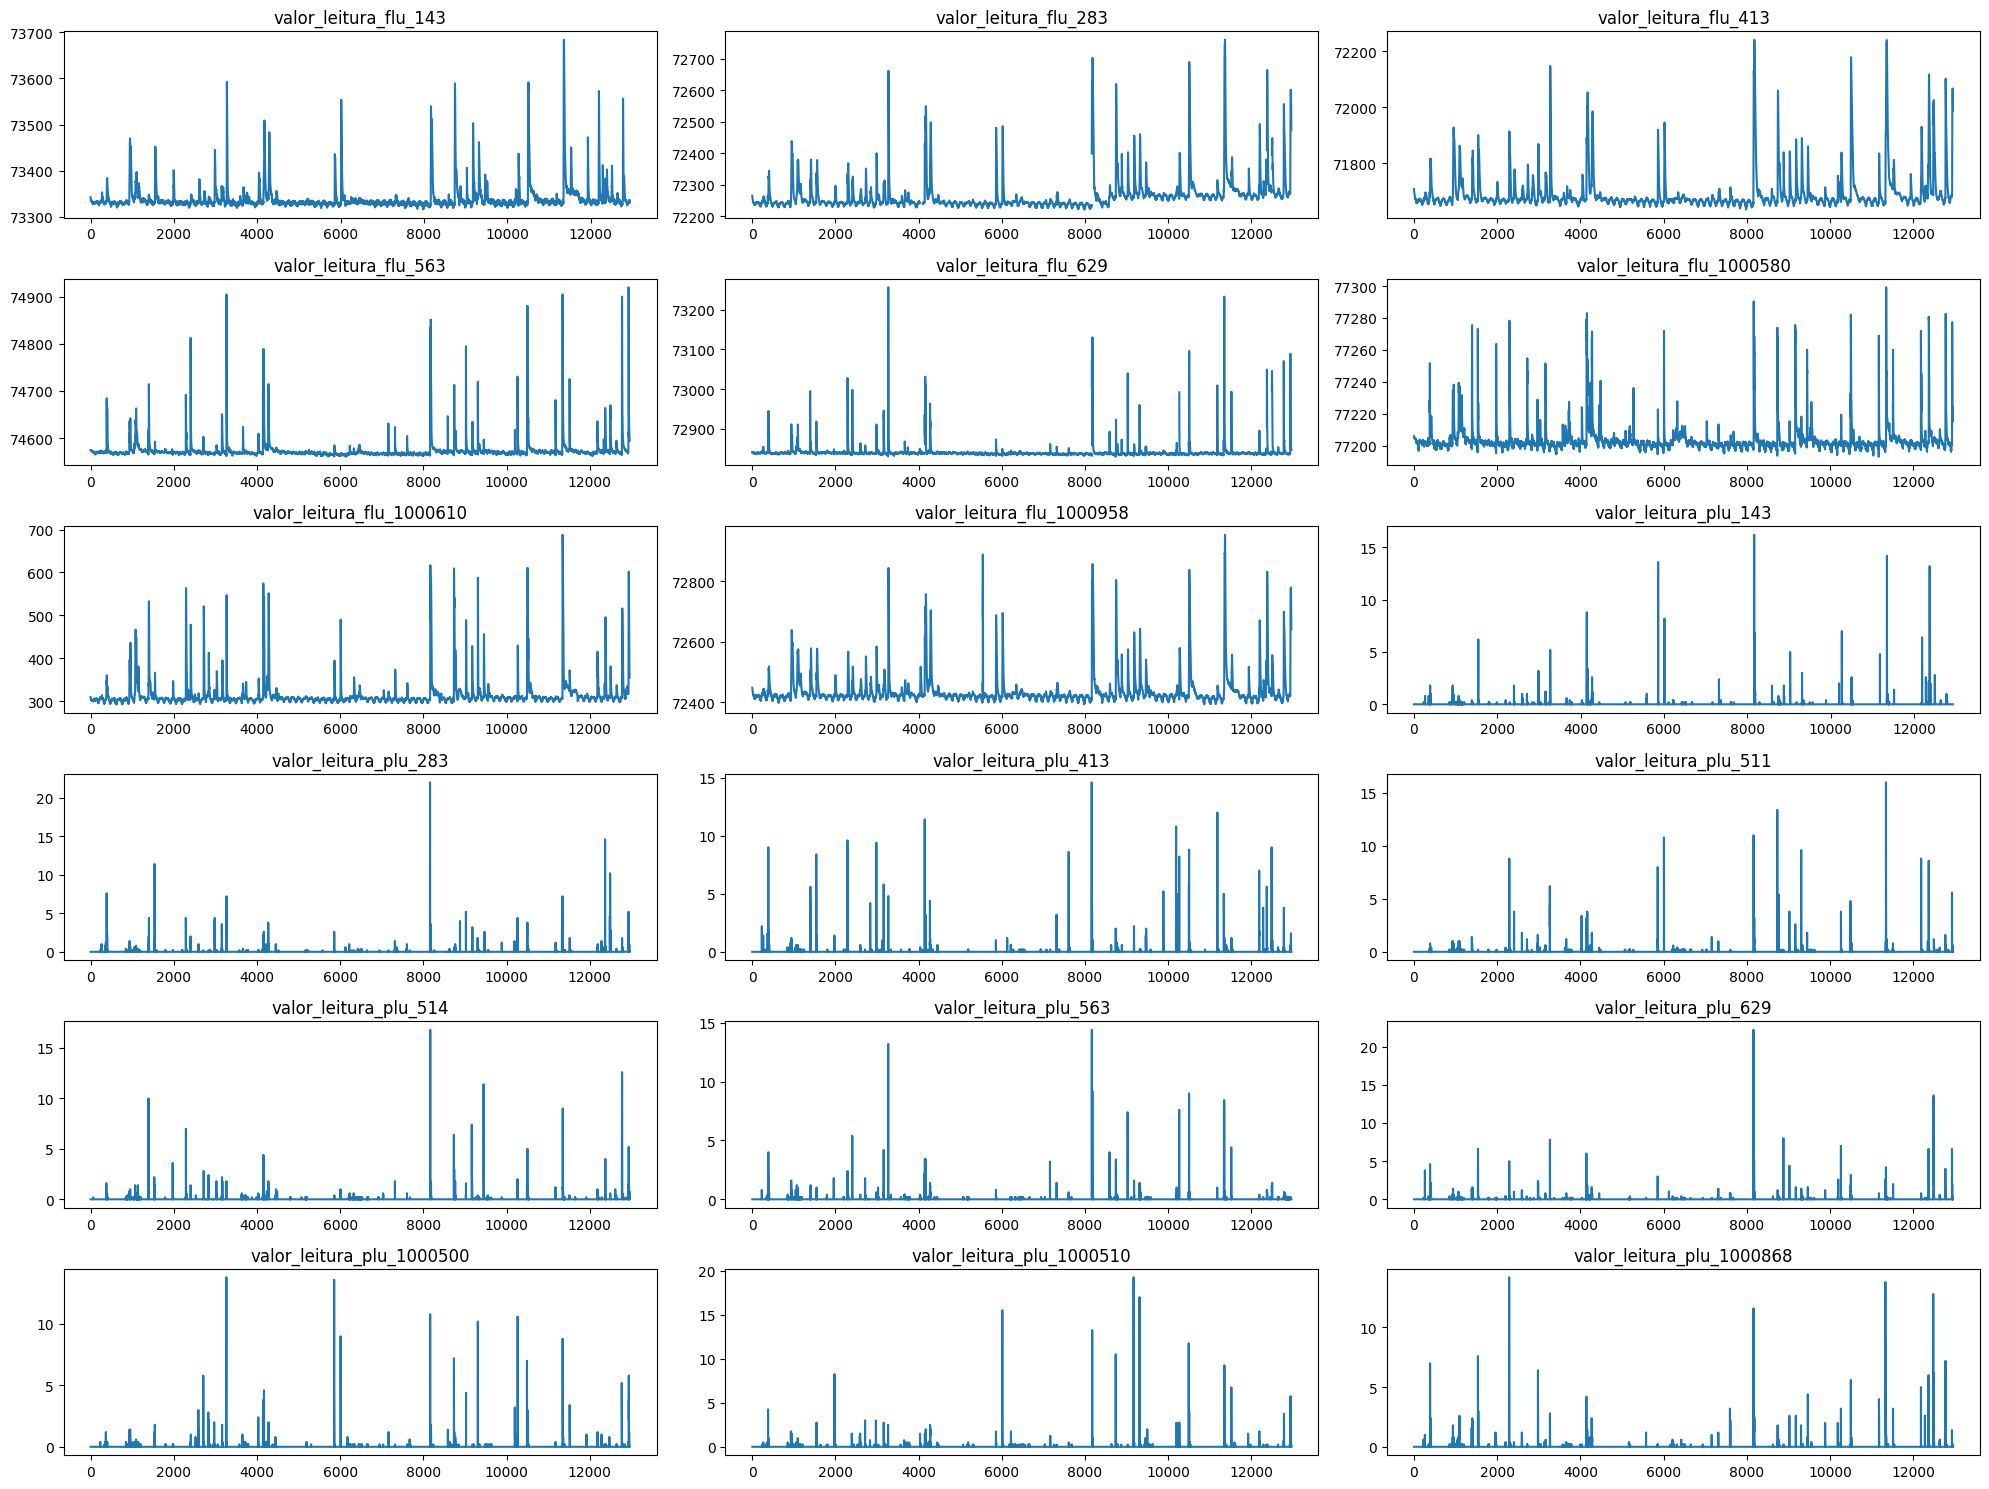

In [31]:
plt.figure(figsize=(20,15))
for i in range(18):
  plt.subplot(6, 3, i+1)
  plt.plot(df_2018[df_2018.columns[1:][i]])
  plt.title(df_2018.columns[1:][i])
  plt.tight_layout()

In [32]:
# Tratar os missing values
#Vamos usar o método de interpolação para preencher valores faltantes em todas as colunas
for column in df_2018:
  df_2018[column].interpolate(method='linear', inplace=True)

for column in df_2018:
  df_2018[column].fillna(method='bfill',inplace=True)

for column in df_2018:
  df_2018[column].fillna(method='ffill',inplace=True)

# 2019

In [33]:
# DADOS DE 2019
#Dados de Rio
todas_flu_parte1_2019 = pd.read_csv ('data/Todas Fluviométricas Parte 1 Jan_2019 a Mar_2019.csv')
todas_flu_parte2_2019 = pd.read_csv ('data/Todas Fluviométricas Parte 2 Jan_2019 a Mar_2019.csv')
#Dados de Chuva
todas_plu_parte1_2019 = pd.read_csv ('data/Todas Pluviométricas Parte 1 Jan_2019 a Mar_2019.csv')
todas_plu_parte2_2019 = pd.read_csv ('data/Todas Pluviométricas Parte 2 Jan_2019 a Mar_2019.csv')

In [34]:
# Lista de Estações
lista_estacoes_flu_parte1_2019 = todas_flu_parte1_2019['prefixo'].unique()
lista_estacoes_flu_parte2_2019 = todas_flu_parte2_2019['prefixo'].unique()
lista_estacoes_plu_parte1_2019 = todas_plu_parte1_2019['prefixo'].unique()
lista_estacoes_plu_parte2_2019 = todas_plu_parte2_2019['prefixo'].unique()

In [35]:
# Tratar dos horários anômalos
horario_inicial = dp.parse(todas_flu_parte1_2019['intervalo'][0])
horario = horario_inicial
horario_string = horario.strftime("%Y-%m-%d %H:%M:%S UTC")

df_horarios = pd.DataFrame(columns=['intervalo'])
for i in range(12960):
  df_horarios.loc[i] = [horario_string]
  horario = horario + timedelta(minutes=10)
  horario_string = horario.strftime("%Y-%m-%d %H:%M:%S UTC")

horarios_anomalos = []
quantidade_estacoes = len(lista_estacoes_flu_parte1_2019)
for j in range(quantidade_estacoes):
  for i in todas_flu_parte1_2019[todas_flu_parte1_2019['prefixo']==lista_estacoes_flu_parte1_2019[j]].reset_index(drop=True)['intervalo']:
    if i not in df_horarios['intervalo'].values.tolist():
      #print(i)
      horarios_anomalos.append(i)
quantidade_estacoes = len(lista_estacoes_flu_parte2_2019)
for j in range(quantidade_estacoes):
  for i in todas_flu_parte2_2019[todas_flu_parte2_2019['prefixo']==lista_estacoes_flu_parte2_2019[j]].reset_index(drop=True)['intervalo']:
    if i not in df_horarios['intervalo'].values.tolist():
      #print(i)
      horarios_anomalos.append(i)
quantidade_estacoes = len(lista_estacoes_plu_parte1_2019)
for j in range(quantidade_estacoes):
  for i in todas_plu_parte1_2019[todas_plu_parte1_2019['prefixo']==lista_estacoes_plu_parte1_2019[j]].reset_index(drop=True)['intervalo']:
    if i not in df_horarios['intervalo'].values.tolist():
      #print(i)
      horarios_anomalos.append(i)
quantidade_estacoes = len(lista_estacoes_plu_parte2_2019)
for j in range(quantidade_estacoes):
  for i in todas_plu_parte2_2019[todas_plu_parte2_2019['prefixo']==lista_estacoes_plu_parte2_2019[j]].reset_index(drop=True)['intervalo']:
    if i not in df_horarios['intervalo'].values.tolist():
      #print(i)
      horarios_anomalos.append(i)

horarios_anomalos

['2019-01-03 23:23:00 UTC',
 '2019-01-06 02:08:00 UTC',
 '2019-03-04 10:11:00 UTC',
 '2019-03-05 10:59:00 UTC',
 '2019-03-14 10:54:00 UTC',
 '2019-03-19 11:37:00 UTC',
 '2019-03-25 10:33:00 UTC',
 '2019-03-26 10:27:00 UTC',
 '2019-01-03 23:23:00 UTC',
 '2019-01-06 02:08:00 UTC',
 '2019-01-26 11:19:00 UTC',
 '2019-02-06 14:15:00 UTC',
 '2019-02-04 17:21:00 UTC',
 '2019-02-05 12:46:00 UTC']

In [36]:
# Remoção das linhas com horários anômalos
for i in range(len(horarios_anomalos)):
  todas_flu_parte1_2019 = todas_flu_parte1_2019[todas_flu_parte1_2019.intervalo != horarios_anomalos[i]]
  todas_flu_parte2_2019 = todas_flu_parte2_2019[todas_flu_parte2_2019.intervalo != horarios_anomalos[i]]
  todas_plu_parte1_2019 = todas_plu_parte1_2019[todas_plu_parte1_2019.intervalo != horarios_anomalos[i]]
  todas_plu_parte2_2019 = todas_plu_parte2_2019[todas_plu_parte2_2019.intervalo != horarios_anomalos[i]]

In [37]:
# Verificar quantidade de dados faltantes nas séries
# Rios
print("Séries de Rios")
for j in range(len(lista_estacoes_flu_parte1_2019)):
  comprimento = len(todas_flu_parte1_2019[todas_flu_parte1_2019['prefixo']==lista_estacoes_flu_parte1_2019[j]])
  print(f"Percentual de dados faltantes na série {lista_estacoes_flu_parte1_2019[j]}: {(1-comprimento/12960)*100}")
for j in range(len(lista_estacoes_flu_parte2_2019)):
  comprimento = len(todas_flu_parte2_2019[todas_flu_parte2_2019['prefixo']==lista_estacoes_flu_parte2_2019[j]])
  print(f"Percentual de dados faltantes na série {lista_estacoes_flu_parte2_2019[j]}: {(1-comprimento/12960)*100}")
print('\n')
print('Séries de Chuva')
for j in range(len(lista_estacoes_plu_parte1_2019)):
  comprimento = len(todas_plu_parte1_2019[todas_plu_parte1_2019['prefixo']==lista_estacoes_plu_parte1_2019[j]])
  print(f"Percentual de dados faltantes na série {lista_estacoes_plu_parte1_2019[j]}: {(1-comprimento/12960)*100}")
for j in range(len(lista_estacoes_plu_parte2_2019)):
  comprimento = len(todas_plu_parte2_2019[todas_plu_parte2_2019['prefixo']==lista_estacoes_plu_parte2_2019[j]])
  print(f"Percentual de dados faltantes na série {lista_estacoes_plu_parte2_2019[j]}: {(1-comprimento/12960)*100}")

Séries de Rios
Percentual de dados faltantes na série 1000370: 0.23919753086419915
Percentual de dados faltantes na série 1000410: 7.445987654320985
Percentual de dados faltantes na série 1000430: 9.282407407407412
Percentual de dados faltantes na série 1000490: 0.37037037037036535
Percentual de dados faltantes na série 1000580: 0.0
Percentual de dados faltantes na série 1000610: 9.1358024691358
Percentual de dados faltantes na série 1000817: 0.023148148148144365
Percentual de dados faltantes na série 1000958: 0.0
Percentual de dados faltantes na série 1000959: 0.007716049382711088
Percentual de dados faltantes na série 157: 0.04629629629629983
Percentual de dados faltantes na série 143: 0.023148148148144365
Percentual de dados faltantes na série 279: 1.1805555555555514
Percentual de dados faltantes na série 280: 1.2654320987654288
Percentual de dados faltantes na série 283: 10.44753086419753
Percentual de dados faltantes na série 413: 0.16203703703703276
Percentual de dados faltantes 

In [38]:
# Unir os dados em um dataframe único
df_list = []
for i in range(len(lista_estacoes_flu_parte1_2019)):
  df_list.append(todas_flu_parte1_2019[todas_flu_parte1_2019['prefixo']==lista_estacoes_flu_parte1_2019[i]].reset_index(drop=True)[['valor_leitura_flu','intervalo']])
for i in range(len(lista_estacoes_flu_parte2_2019)):
  df_list.append(todas_flu_parte2_2019[todas_flu_parte2_2019['prefixo']==lista_estacoes_flu_parte2_2019[i]].reset_index(drop=True)[['valor_leitura_flu','intervalo']])
for i in range(len(lista_estacoes_plu_parte1_2019)):
  df_list.append(todas_plu_parte1_2019[todas_plu_parte1_2019['prefixo']==lista_estacoes_plu_parte1_2019[i]].reset_index(drop=True)[['valor_leitura_plu','intervalo']])
for i in range(len(lista_estacoes_plu_parte2_2019)):
  df_list.append(todas_plu_parte2_2019[todas_plu_parte2_2019['prefixo']==lista_estacoes_plu_parte2_2019[i]].reset_index(drop=True)[['valor_leitura_plu','intervalo']])

#Vamos juntar todos os dataframes em um único
df_merged_2019 = df_horarios
for i in range(len(df_list)):
  df_merged_2019 = pd.merge(df_merged_2019,df_list[i],on='intervalo',how='outer',sort=True)

/var/folders/42/r82q94mx2mn34pcn5mfpgb_00000gn/T/ipykernel_10449/2333663442.py:15: FutureWarning: Passing 'suffixes' which cause duplicate columns {'valor_leitura_flu_x'} in the result is deprecated and will raise a MergeError in a future version.
  df_merged_2019 = pd.merge(df_merged_2019,df_list[i],on='intervalo',how='outer',sort=True)
/var/folders/42/r82q94mx2mn34pcn5mfpgb_00000gn/T/ipykernel_10449/2333663442.py:15: FutureWarning: Passing 'suffixes' which cause duplicate columns {'valor_leitura_flu_x'} in the result is deprecated and will raise a MergeError in a future version.
  df_merged_2019 = pd.merge(df_merged_2019,df_list[i],on='intervalo',how='outer',sort=True)
/var/folders/42/r82q94mx2mn34pcn5mfpgb_00000gn/T/ipykernel_10449/2333663442.py:15: FutureWarning: Passing 'suffixes' which cause duplicate columns {'valor_leitura_flu_x'} in the result is deprecated and will raise a MergeError in a future version.
  df_merged_2019 = pd.merge(df_merged_2019,df_list[i],on='intervalo',how

In [39]:
nomes_colunas = ['intervalo']
for i in range(len(lista_estacoes_flu_parte1_2019)):
  nomes_colunas.append('valor_leitura_flu_' + str(lista_estacoes_flu_parte1_2019[i]))
for i in range(len(lista_estacoes_flu_parte2_2019)):
  nomes_colunas.append('valor_leitura_flu_' + str(lista_estacoes_flu_parte2_2019[i]))
for i in range(len(lista_estacoes_plu_parte1_2019)):
  nomes_colunas.append('valor_leitura_plu_' + str(lista_estacoes_plu_parte1_2019[i]))
for i in range(len(lista_estacoes_plu_parte2_2019)):
  nomes_colunas.append('valor_leitura_plu_' + str(lista_estacoes_plu_parte2_2019[i]))

In [40]:
#Mudando o nome das colunas
df_merged_2019.columns = nomes_colunas
# Filtrando para usar apenas os campos desejados
df_2019 = df_merged_2019.filter(['intervalo','valor_leitura_flu_143','valor_leitura_flu_283','valor_leitura_flu_413','valor_leitura_flu_563','valor_leitura_flu_629','valor_leitura_flu_1000580','valor_leitura_flu_1000610','valor_leitura_flu_1000958','valor_leitura_plu_143','valor_leitura_plu_283','valor_leitura_plu_413','valor_leitura_plu_511','valor_leitura_plu_514','valor_leitura_plu_563','valor_leitura_plu_629','valor_leitura_plu_1000500','valor_leitura_plu_1000510','valor_leitura_plu_1000868'], axis=1)

In [41]:
df_2019

intervalo  valor_leitura_flu_143  valor_leitura_flu_283  \
0      2019-01-01 02:00:00 UTC              73334.195              72264.200   
1      2019-01-01 02:10:00 UTC              73336.800              72264.600   
2      2019-01-01 02:20:00 UTC              73336.800              72265.195   
3      2019-01-01 02:30:00 UTC              73336.800              72265.600   
4      2019-01-01 02:40:00 UTC              73335.900              72265.600   
...                        ...                    ...                    ...   
12955  2019-04-01 01:10:00 UTC              73337.090              72274.400   
12956  2019-04-01 01:20:00 UTC              73337.200              72273.900   
12957  2019-04-01 01:30:00 UTC              73336.800              72273.900   
12958  2019-04-01 01:40:00 UTC              73336.000              72273.400   
12959  2019-04-01 01:50:00 UTC              73334.695              72273.400   

       valor_leitura_flu_413  valor_leitura_flu_563  valor_leitura_flu_629  \
0                  71665.695               74569.40              72837.410   
1                  71664.600               74568.91              72837.410   
2                  71664.600               74569.40              72837.800   
3                  71665.695               74568.91              72837.700   
4                  71664.600               74568.91              72837.910   
...                      ...                    ...                    ...   
12955              71670.200               74576.20              72840.195   
12956              71669.100               74576.10              72840.195   
12957              71669.100               74576.20              72840.195   
12958              71669.100               74575.80              72839.805   
12959              71669.100               74576.20              72839.500   

       valor_leitura_flu_1000580  valor_leitura_flu_1000610  \
0                        77200.5                        NaN   
1                        77200.2                        NaN   
2                        77200.5                        NaN   
3                        77200.3                        NaN   
4                        77200.5                        NaN   
...                          ...                        ...   
12955                    77199.8                      314.4   
12956                    77199.4                      314.5   
12957                    77199.3                      314.5   
12958                    77199.3                      314.1   
12959                    77199.4                      313.8   

       valor_leitura_flu_1000958  valor_leitura_plu_143  \
0                        72416.1                    0.0   
1                        72417.2                    0.0   
2                        72417.2                    0.0   
3                        72418.2                    0.0   
4                        72418.2                    0.0   
...                          ...                    ...   
12955                    72425.5                    0.0   
12956                    72425.5                    0.0   
12957                    72424.4                    0.0   
12958                    72424.4                    0.0   
12959                    72424.4                    0.0   

       valor_leitura_plu_283  valor_leitura_plu_413  valor_leitura_plu_511  \
0                        0.0                    0.0                    0.0   
1                        0.0                    0.0                    0.0   
2                        0.0                    0.0                    0.0   
3                        0.0                    0.0                    0.0   
4                        0.0                    0.0                    0.0   
...                      ...                    ...                    ...   
12955                    0.0                    0.0                    0.0   
12956                    0.0     

## Visualização

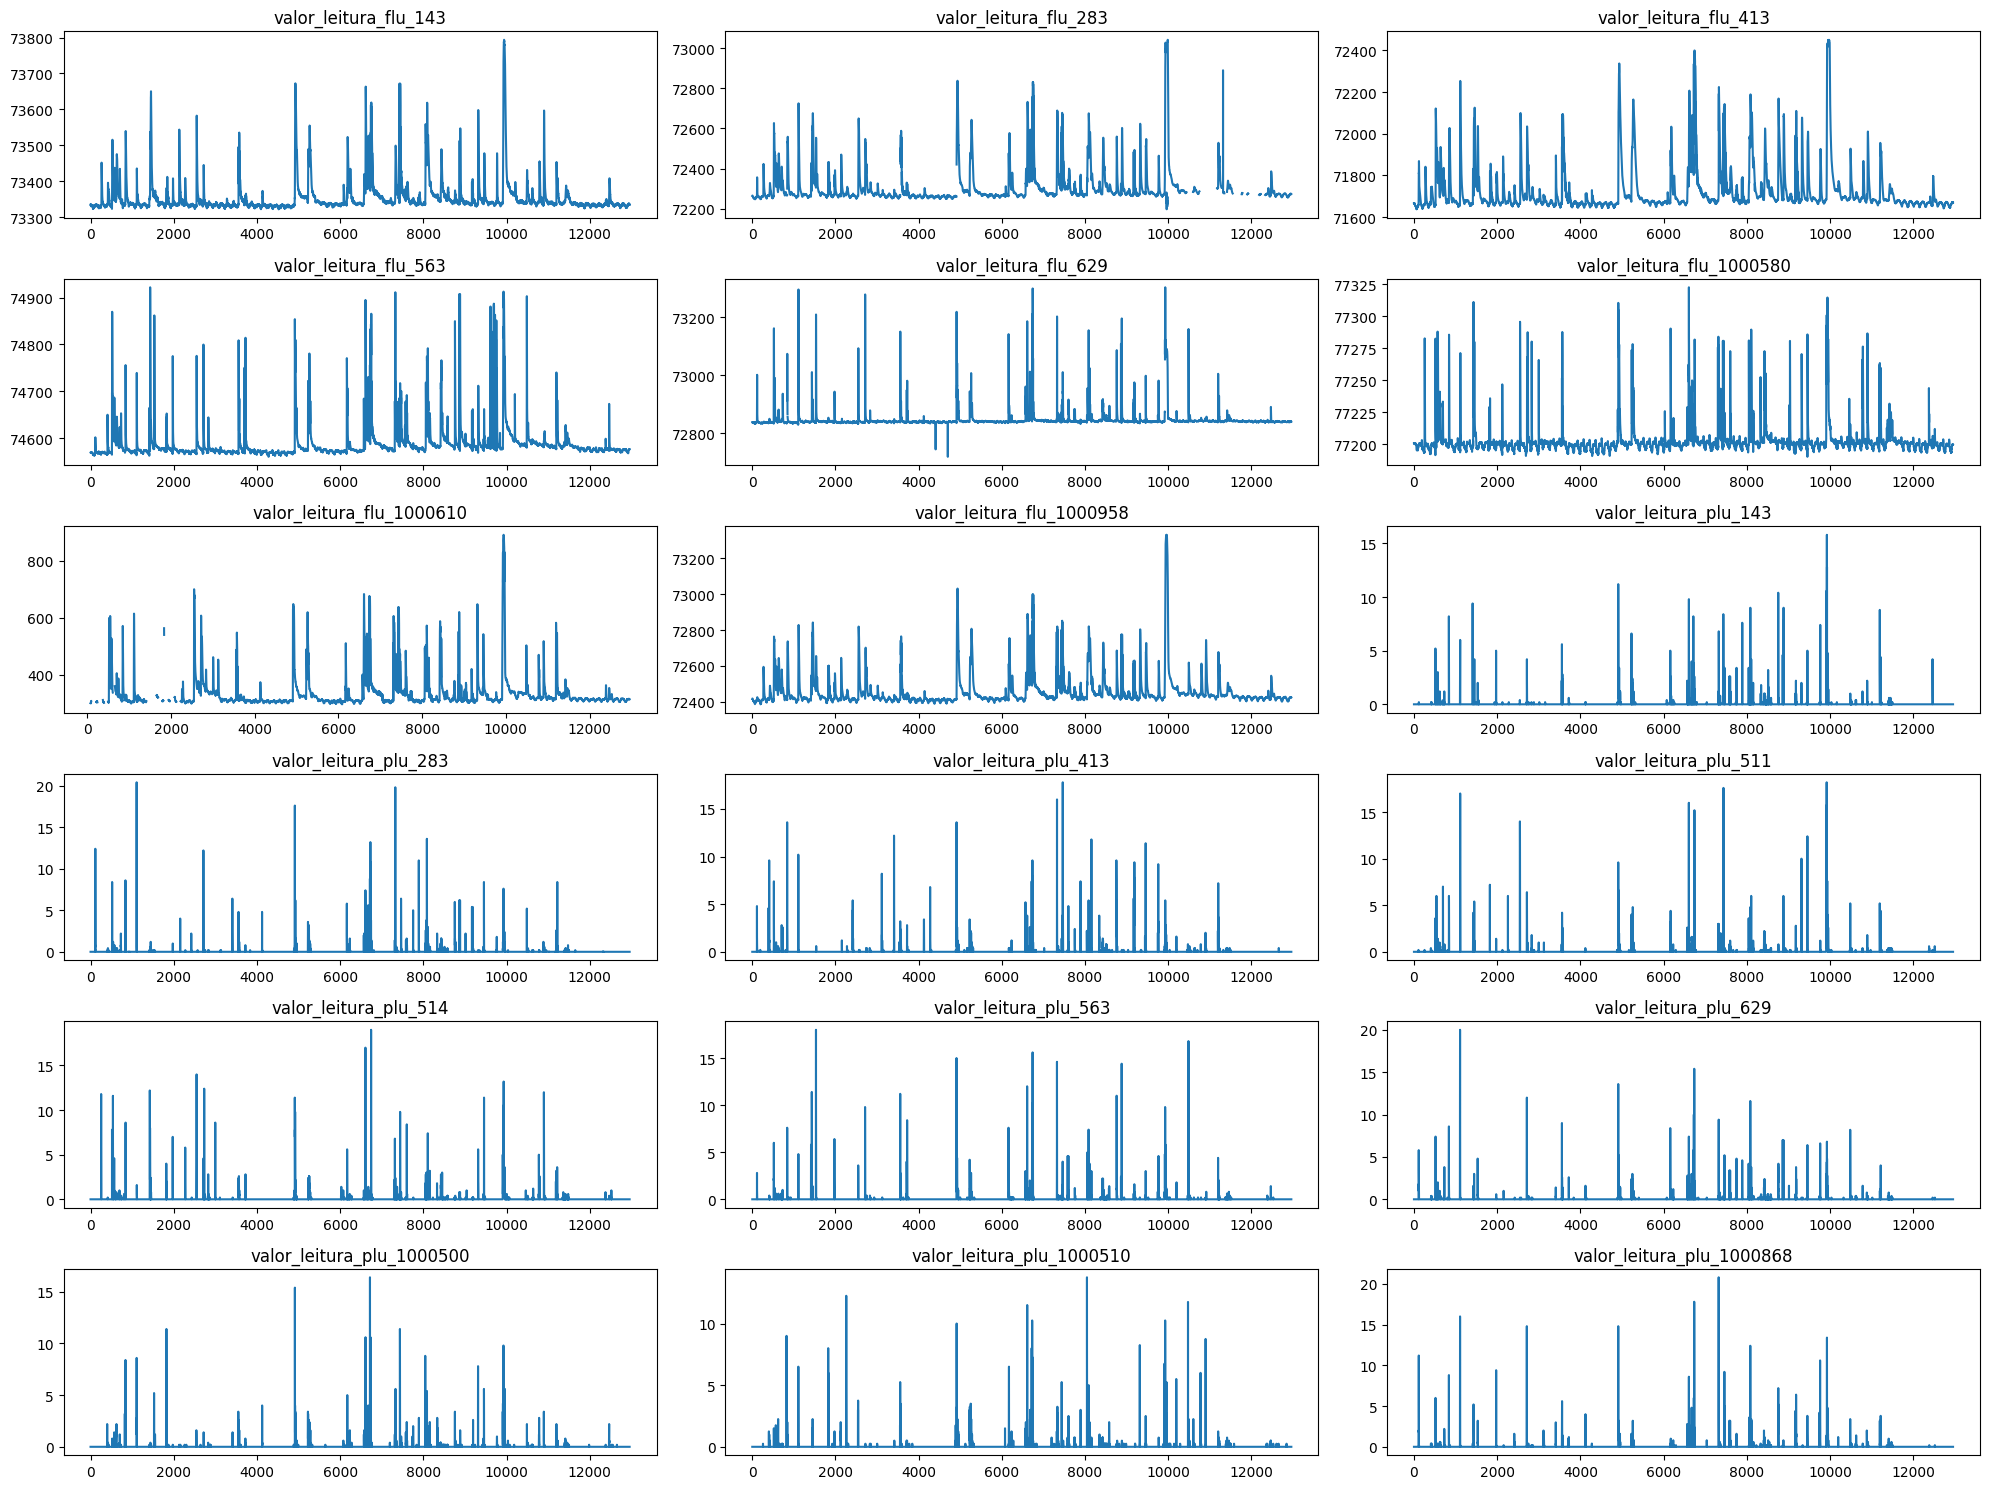

In [42]:
plt.figure(figsize=(20,15))
for i in range(18):
  plt.subplot(6, 3, i+1)
  plt.plot(df_2019[df_2019.columns[1:][i]])
  plt.title(df_2019.columns[1:][i])
  plt.tight_layout()

In [43]:
# Tratar os missing values
#Vamos usar o método de interpolação para preencher valores faltantes em todas as colunas
for column in df_2019:
  df_2019[column].interpolate(method='linear', inplace=True)

# Tratar os missing values
# Ainda sobraram missing values que estavam no início e não foram afetados pela interpolação. Nesse caso, vamos usar o método bfill
for column in df_2019:
  df_2019[column].fillna(method='bfill',inplace=True)

for column in df_2019:
  df_2019[column].fillna(method='ffill',inplace=True)

In [44]:
# Reordenar para que todos tenham a mesma ordem de colunas
df_2019 = df_2019[list(df_2018.columns)]

# 2020

In [45]:
# Rio
todas_flu_2020 = pd.read_csv ('data/Todas Fluviométricas Jan_2020 a Mar_2020.csv')
# Chuva
todas_plu_parte1_2020 = pd.read_csv ('data/Todas Pluviométricas Parte 1 Jan_2020 a Mar_2020.csv')
todas_plu_parte2_2020 = pd.read_csv ('data/Todas Pluviométricas Parte 2 Jan_2020 a Mar_2020.csv')
todas_plu_parte3_2020 = pd.read_csv ('data/Todas Pluviométricas Parte 3 Jan_2020 a Mar_2020.csv')
todas_plu_parte4_2020 = pd.read_csv ('data/Todas Pluviométricas Parte 4 Jan_2020 a Mar_2020.csv')

In [46]:
# Lista de estações
lista_estacoes_flu_2020 = todas_flu_2020['prefixo'].unique()
lista_estacoes_plu_parte1_2020 = todas_plu_parte1_2020['prefixo'].unique()
lista_estacoes_plu_parte2_2020 = todas_plu_parte2_2020['prefixo'].unique()
lista_estacoes_plu_parte3_2020 = todas_plu_parte3_2020['prefixo'].unique()
lista_estacoes_plu_parte4_2020 = todas_plu_parte4_2020['prefixo'].unique()

In [47]:
# Tratar dos horários anômalos

horario_inicial = dp.parse(todas_flu_2020['intervalo'][0])
horario = horario_inicial
horario_string = horario.strftime("%Y-%m-%d %H:%M:%S UTC")

df_horarios = pd.DataFrame(columns=['intervalo'])
for i in range(13104):
  df_horarios.loc[i] = [horario_string]
  horario = horario + timedelta(minutes=10)
  horario_string = horario.strftime("%Y-%m-%d %H:%M:%S UTC")

df_horarios

horarios_anomalos = []
quantidade_estacoes = len(lista_estacoes_flu_2020)
for j in range(quantidade_estacoes):
  for i in todas_flu_2020[todas_flu_2020['prefixo']==lista_estacoes_flu_2020[j]].reset_index(drop=True)['intervalo']:
    if i not in df_horarios['intervalo'].values.tolist():
      #print(i)
      horarios_anomalos.append(i)
quantidade_estacoes = len(lista_estacoes_plu_parte2_2020)
for j in range(quantidade_estacoes):
  for i in todas_plu_parte2_2020[todas_plu_parte2_2020['prefixo']==lista_estacoes_plu_parte2_2020[j]].reset_index(drop=True)['intervalo']:
    if i not in df_horarios['intervalo'].values.tolist():
      #print(i)
      horarios_anomalos.append(i)
quantidade_estacoes = len(lista_estacoes_plu_parte3_2020)
for j in range(quantidade_estacoes):
  for i in todas_plu_parte3_2020[todas_plu_parte3_2020['prefixo']==lista_estacoes_plu_parte3_2020[j]].reset_index(drop=True)['intervalo']:
    if i not in df_horarios['intervalo'].values.tolist():
      #print(i)
      horarios_anomalos.append(i)
quantidade_estacoes = len(lista_estacoes_plu_parte4_2020)
for j in range(quantidade_estacoes):
  for i in todas_plu_parte4_2020[todas_plu_parte4_2020['prefixo']==lista_estacoes_plu_parte4_2020[j]].reset_index(drop=True)['intervalo']:
    if i not in df_horarios['intervalo'].values.tolist():
      #print(i)
      horarios_anomalos.append(i)

horarios_anomalos

[]

In [48]:
# Verificar quantidade de dados faltantes nas séries
# Rios
print('Séries de Rio')
for j in range(len(lista_estacoes_flu_2020)):
  comprimento = len(todas_flu_2020[todas_flu_2020['prefixo']==lista_estacoes_flu_2020[j]])
  print(f"Percentual de dados faltantes na série {lista_estacoes_flu_2020[j]}: {(1-comprimento/13104)*100}")

# Chuva
print('\n')
print('Séries de Chuva')
for j in range(len(lista_estacoes_plu_parte1_2020)):
  comprimento = len(todas_plu_parte1_2020[todas_plu_parte1_2020['prefixo']==lista_estacoes_plu_parte1_2020[j]])
  print(f"Percentual de dados faltantes na série {lista_estacoes_plu_parte1_2020[j]}: {(1-comprimento/13104)*100}")
for j in range(len(lista_estacoes_plu_parte2_2020)):
  comprimento = len(todas_plu_parte2_2020[todas_plu_parte2_2020['prefixo']==lista_estacoes_plu_parte2_2020[j]])
  print(f"Percentual de dados faltantes na série {lista_estacoes_plu_parte2_2020[j]}: {(1-comprimento/13104)*100}")
for j in range(len(lista_estacoes_plu_parte3_2020)):
  comprimento = len(todas_plu_parte3_2020[todas_plu_parte3_2020['prefixo']==lista_estacoes_plu_parte3_2020[j]])
  print(f"Percentual de dados faltantes na série {lista_estacoes_plu_parte3_2020[j]}: {(1-comprimento/13104)*100}")
for j in range(len(lista_estacoes_plu_parte4_2020)):
  comprimento = len(todas_plu_parte4_2020[todas_plu_parte4_2020['prefixo']==lista_estacoes_plu_parte4_2020[j]])
  print(f"Percentual de dados faltantes na série {lista_estacoes_plu_parte4_2020[j]}: {(1-comprimento/13104)*100}")

Séries de Rio
Percentual de dados faltantes na série 1000370: 9.27960927960928
Percentual de dados faltantes na série 1000410: 20.6959706959707
Percentual de dados faltantes na série 1000430: 6.0286935286935295
Percentual de dados faltantes na série 1000490: 27.037545787545792
Percentual de dados faltantes na série 1000580: 3.243284493284493
Percentual de dados faltantes na série 1000610: 3.4798534798534786
Percentual de dados faltantes na série 1000817: 3.9072039072039044
Percentual de dados faltantes na série 1000958: 2.3427960927960956
Percentual de dados faltantes na série 1000959: 37.065018315018314
Percentual de dados faltantes na série 143: 5.616605616605619
Percentual de dados faltantes na série 157: 1.350732600732596
Percentual de dados faltantes na série 279: 39.9496336996337
Percentual de dados faltantes na série 280: 1.0683760683760646
Percentual de dados faltantes na série 283: 1.7322954822954872
Percentual de dados faltantes na série 413: 1.1981074481074439
Percentual de 

In [49]:
#Unir em um dataframe único

df_list = []
for i in range(len(lista_estacoes_flu_2020)):
  df_list.append(todas_flu_2020[todas_flu_2020['prefixo']==lista_estacoes_flu_2020[i]].reset_index(drop=True)[['valor_leitura_flu','intervalo']])
for i in range(len(lista_estacoes_plu_parte2_2020)):
  df_list.append(todas_plu_parte2_2020[todas_plu_parte2_2020['prefixo']==lista_estacoes_plu_parte2_2020[i]].reset_index(drop=True)[['valor_leitura_plu','intervalo']])
for i in range(len(lista_estacoes_plu_parte3_2020)):
  df_list.append(todas_plu_parte3_2020[todas_plu_parte3_2020['prefixo']==lista_estacoes_plu_parte3_2020[i]].reset_index(drop=True)[['valor_leitura_plu','intervalo']])
for i in range(len(lista_estacoes_plu_parte4_2020)):
  df_list.append(todas_plu_parte4_2020[todas_plu_parte4_2020['prefixo']==lista_estacoes_plu_parte4_2020[i]].reset_index(drop=True)[['valor_leitura_plu','intervalo']])

#Vamos juntar todos os dataframes em um único
df_merged_2020 = df_horarios
for i in range(len(df_list)):
  df_merged_2020 = pd.merge(df_merged_2020,df_list[i],on='intervalo',how='outer',sort=True)

/var/folders/42/r82q94mx2mn34pcn5mfpgb_00000gn/T/ipykernel_10449/1424224919.py:16: FutureWarning: Passing 'suffixes' which cause duplicate columns {'valor_leitura_flu_x'} in the result is deprecated and will raise a MergeError in a future version.
  df_merged_2020 = pd.merge(df_merged_2020,df_list[i],on='intervalo',how='outer',sort=True)
/var/folders/42/r82q94mx2mn34pcn5mfpgb_00000gn/T/ipykernel_10449/1424224919.py:16: FutureWarning: Passing 'suffixes' which cause duplicate columns {'valor_leitura_flu_x'} in the result is deprecated and will raise a MergeError in a future version.
  df_merged_2020 = pd.merge(df_merged_2020,df_list[i],on='intervalo',how='outer',sort=True)
/var/folders/42/r82q94mx2mn34pcn5mfpgb_00000gn/T/ipykernel_10449/1424224919.py:16: FutureWarning: Passing 'suffixes' which cause duplicate columns {'valor_leitura_flu_x'} in the result is deprecated and will raise a MergeError in a future version.
  df_merged_2020 = pd.merge(df_merged_2020,df_list[i],on='intervalo',how

In [50]:
nomes_colunas = ['intervalo']
for i in range(len(lista_estacoes_flu_2020)):
  nomes_colunas.append('valor_leitura_flu_' + str(lista_estacoes_flu_2020[i]))
for i in range(len(lista_estacoes_plu_parte2_2020)):
  nomes_colunas.append('valor_leitura_plu_' + str(lista_estacoes_plu_parte2_2020[i]))
for i in range(len(lista_estacoes_plu_parte3_2020)):
  nomes_colunas.append('valor_leitura_plu_' + str(lista_estacoes_plu_parte3_2020[i]))
for i in range(len(lista_estacoes_plu_parte4_2020)):
  nomes_colunas.append('valor_leitura_plu_' + str(lista_estacoes_plu_parte4_2020[i]))

In [51]:
#Mudando o nome das colunas
df_merged_2020.columns = nomes_colunas
# Eliminando dados de rio que não vamos usar
df_2020 = df_merged_2020.filter(['intervalo','valor_leitura_flu_143','valor_leitura_flu_283','valor_leitura_flu_413','valor_leitura_flu_563','valor_leitura_flu_629','valor_leitura_flu_1000580','valor_leitura_flu_1000610','valor_leitura_flu_1000958','valor_leitura_plu_143','valor_leitura_plu_283','valor_leitura_plu_413','valor_leitura_plu_511','valor_leitura_plu_514','valor_leitura_plu_563','valor_leitura_plu_629','valor_leitura_plu_1000500','valor_leitura_plu_1000510','valor_leitura_plu_1000868'], axis=1)

In [52]:
df_2020

intervalo  valor_leitura_flu_143  valor_leitura_flu_283  \
0      2020-01-01 03:00:00 UTC              73340.600                72263.8   
1      2020-01-01 03:10:00 UTC              73340.195                72263.0   
2      2020-01-01 03:20:00 UTC              73337.300                72263.3   
3      2020-01-01 03:30:00 UTC              73340.195                72263.8   
4      2020-01-01 03:40:00 UTC              73340.195                72263.8   
...                        ...                    ...                    ...   
13099  2020-04-01 02:10:00 UTC              73340.195                72268.1   
13100  2020-04-01 02:20:00 UTC              73341.100                72267.6   
13101  2020-04-01 02:30:00 UTC              73340.600                72267.6   
13102  2020-04-01 02:40:00 UTC              73341.100                72267.6   
13103  2020-04-01 02:50:00 UTC              73340.195                72267.7   

       valor_leitura_flu_413  valor_leitura_flu_563  valor_leitura_flu_629  \
0                  71661.200              74569.400               72836.70   
1                  71661.200              74569.400               72837.09   
2                  71660.195              74569.400               72836.70   
3                  71660.195              74569.100               72836.50   
4                  71660.195              74569.400               72836.00   
...                      ...                    ...                    ...   
13099              71670.100              74573.100               72843.40   
13100              71670.100              74572.695               72843.10   
13101              71669.100              74572.695               72843.10   
13102              71669.100              74573.100               72843.10   
13103              71669.100              74572.900               72842.70   

       valor_leitura_flu_1000580  valor_leitura_flu_1000610  \
0                       77199.91                      309.5   
1                       77200.00                      308.4   
2                       77199.59                      308.8   
3                       77199.91                      308.5   
4                       77199.91                      308.2   
...                          ...                        ...   
13099                   77200.30                      314.4   
13100                   77200.30                      314.5   
13101                   77200.41                      314.2   
13102                   77199.91                      314.0   
13103                   77200.30                      314.2   

       valor_leitura_flu_1000958  valor_leitura_plu_143  \
0                      72418.000                    0.0   
1                      72418.000                    0.0   
2                      72418.000                    0.0   
3                      72418.000                    0.0   
4                      72418.000                    0.0   
...                          ...                    ...   
13099                  72420.400                    0.0   
13100                  72420.400                    0.0   
13101                  72421.305                    0.0   
13102                  72421.400                    0.0   
13103                  72421.400                    0.0   

       valor_leitura_plu_283  valor_leitura_plu_413  valor_leitura_plu_511  \
0                        0.0                    0.0                    0.0   
1                        0.0                    0.0                    0.0   
2                        0.0                    0.0                    0.0   
3                        0.0                    0.0                    0.0   
4                        0.0                    0.0                    0.0   
...                      ...                    ...                    ...   
13099                    0.0                    0.0                    0.0   
13100                    0.0     

## Visualização

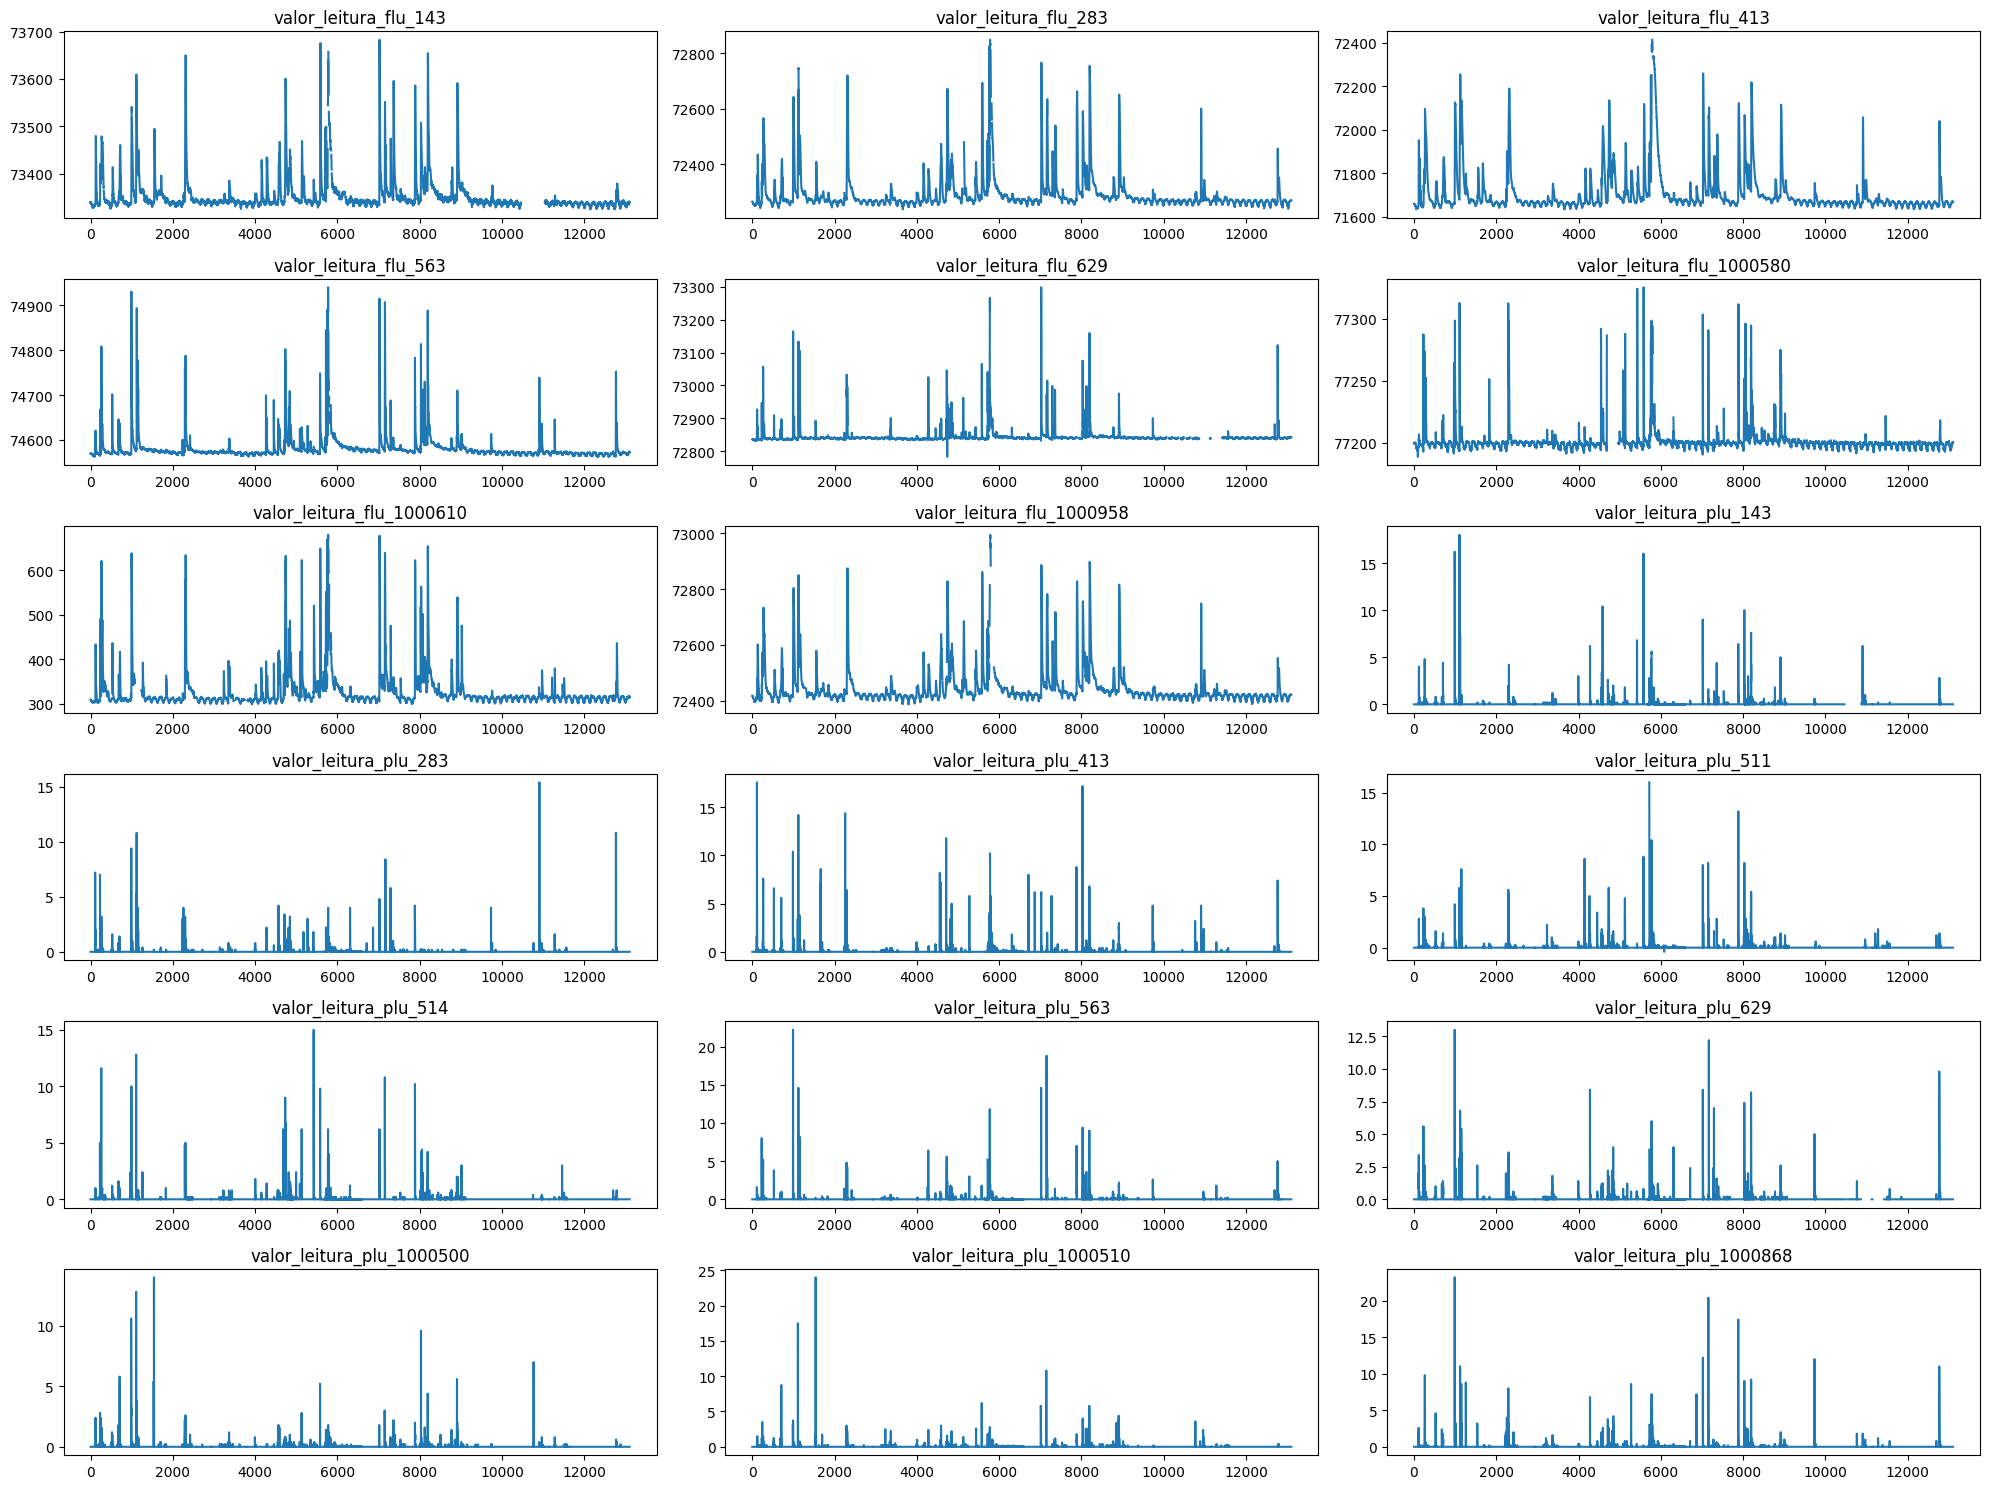

In [53]:
plt.figure(figsize=(20,15))
for i in range(18):
  plt.subplot(6, 3, i+1)
  plt.plot(df_2020[df_2020.columns[1:][i]])
  plt.title(df_2020.columns[1:][i])
  plt.tight_layout()

In [54]:
# Tratar os missing values
#Vamos usar o método de interpolação para preencher valores faltantes em todas as colunas
for column in df_2020:
  df_2020[column].interpolate(method='linear', inplace=True)

for column in df_2020:
  df_2020[column].fillna(method='bfill',inplace=True)

for column in df_2020:
  df_2020[column].fillna(method='ffill',inplace=True)

In [55]:
# Reordenar para que todos tenham a mesma ordem de colunas
df_2020 = df_2020[list(df_2018.columns)]

In [56]:
df_2020

intervalo  valor_leitura_flu_143  valor_leitura_flu_283  \
0      2020-01-01 03:00:00 UTC              73340.600                72263.8   
1      2020-01-01 03:10:00 UTC              73340.195                72263.0   
2      2020-01-01 03:20:00 UTC              73337.300                72263.3   
3      2020-01-01 03:30:00 UTC              73340.195                72263.8   
4      2020-01-01 03:40:00 UTC              73340.195                72263.8   
...                        ...                    ...                    ...   
13099  2020-04-01 02:10:00 UTC              73340.195                72268.1   
13100  2020-04-01 02:20:00 UTC              73341.100                72267.6   
13101  2020-04-01 02:30:00 UTC              73340.600                72267.6   
13102  2020-04-01 02:40:00 UTC              73341.100                72267.6   
13103  2020-04-01 02:50:00 UTC              73340.195                72267.7   

       valor_leitura_flu_413  valor_leitura_flu_563  valor_leitura_flu_629  \
0                  71661.200              74569.400               72836.70   
1                  71661.200              74569.400               72837.09   
2                  71660.195              74569.400               72836.70   
3                  71660.195              74569.100               72836.50   
4                  71660.195              74569.400               72836.00   
...                      ...                    ...                    ...   
13099              71670.100              74573.100               72843.40   
13100              71670.100              74572.695               72843.10   
13101              71669.100              74572.695               72843.10   
13102              71669.100              74573.100               72843.10   
13103              71669.100              74572.900               72842.70   

       valor_leitura_flu_1000580  valor_leitura_flu_1000610  \
0                       77199.91                      309.5   
1                       77200.00                      308.4   
2                       77199.59                      308.8   
3                       77199.91                      308.5   
4                       77199.91                      308.2   
...                          ...                        ...   
13099                   77200.30                      314.4   
13100                   77200.30                      314.5   
13101                   77200.41                      314.2   
13102                   77199.91                      314.0   
13103                   77200.30                      314.2   

       valor_leitura_flu_1000958  valor_leitura_plu_143  \
0                      72418.000                    0.0   
1                      72418.000                    0.0   
2                      72418.000                    0.0   
3                      72418.000                    0.0   
4                      72418.000                    0.0   
...                          ...                    ...   
13099                  72420.400                    0.0   
13100                  72420.400                    0.0   
13101                  72421.305                    0.0   
13102                  72421.400                    0.0   
13103                  72421.400                    0.0   

       valor_leitura_plu_283  valor_leitura_plu_413  valor_leitura_plu_511  \
0                        0.0                    0.0                    0.0   
1                        0.0                    0.0                    0.0   
2                        0.0                    0.0                    0.0   
3                        0.0                    0.0                    0.0   
4                        0.0                    0.0                    0.0   
...                      ...                    ...                    ...   
13099                    0.0                    0.0                    0.0   
13100                    0.0     

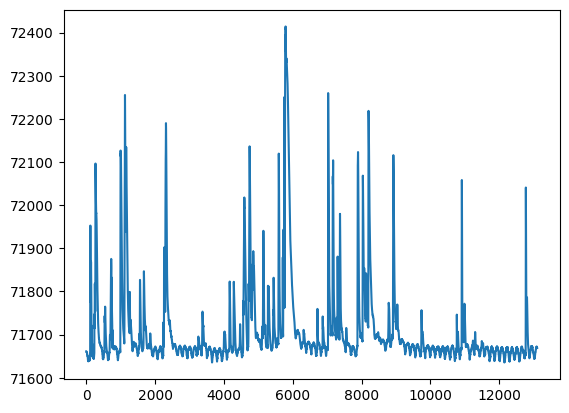

In [57]:
plt.plot(df_2020['valor_leitura_flu_413'])

# 2021

In [58]:
# Dados de Rio
todas_flu_parte1_2021 = pd.read_csv ('data/Todas Fluviométricas Parte 1 Jan_2021 a Mar_2021.csv')
todas_flu_parte2_2021 = pd.read_csv ('data/Todas Fluviométricas Parte 2 Jan_2021 a Mar_2021.csv')

# Chuva
todas_plu_parte1_2021 = pd.read_csv ('data/Todas Pluviométricas Parte 1 Jan_2021 a Mar_2021.csv')
todas_plu_parte2_2021 = pd.read_csv ('data/Todas Pluviométricas Parte 2 Jan_2021 a Mar_2021.csv')
todas_plu_parte3_2021 = pd.read_csv ('data/Todas Pluviométricas Parte 3 Jan_2021 a Mar_2021.csv')
todas_plu_parte4_2021 = pd.read_csv ('data/Todas Pluviométricas Parte 4 Jan_2021 a Mar_2021.csv')

In [59]:
# Lista de Estações
lista_estacoes_flu_parte1_2021 = todas_flu_parte1_2021['prefixo'].unique()
lista_estacoes_flu_parte2_2021 = todas_flu_parte2_2021['prefixo'].unique()
lista_estacoes_plu_parte1_2021 = todas_plu_parte1_2021['prefixo'].unique()
lista_estacoes_plu_parte2_2021 = todas_plu_parte2_2021['prefixo'].unique()
lista_estacoes_plu_parte3_2021 = todas_plu_parte3_2021['prefixo'].unique()
lista_estacoes_plu_parte4_2021 = todas_plu_parte4_2021['prefixo'].unique()

In [60]:
# Tratar dos horários anômalos
horario_inicial = dp.parse(todas_flu_parte1_2021['intervalo'][0])
horario = horario_inicial
horario_string = horario.strftime("%Y-%m-%d %H:%M:%S UTC")

df_horarios = pd.DataFrame(columns=['intervalo'])
for i in range(12960):
  df_horarios.loc[i] = [horario_string]
  horario = horario + timedelta(minutes=10)
  horario_string = horario.strftime("%Y-%m-%d %H:%M:%S UTC")

horarios_anomalos = []
quantidade_estacoes = len(lista_estacoes_flu_parte1_2021)
for j in range(quantidade_estacoes):
  for i in todas_flu_parte1_2021[todas_flu_parte1_2021['prefixo']==lista_estacoes_flu_parte1_2021[j]].reset_index(drop=True)['intervalo']:
    if i not in df_horarios['intervalo'].values.tolist():
      #print(i)
      horarios_anomalos.append(i)
quantidade_estacoes = len(lista_estacoes_flu_parte2_2021)
for j in range(quantidade_estacoes):
  for i in todas_flu_parte2_2021[todas_flu_parte2_2021['prefixo']==lista_estacoes_flu_parte2_2021[j]].reset_index(drop=True)['intervalo']:
    if i not in df_horarios['intervalo'].values.tolist():
      #print(i)
      horarios_anomalos.append(i)
quantidade_estacoes = len(lista_estacoes_plu_parte1_2021)
for j in range(quantidade_estacoes):
  for i in todas_plu_parte1_2021[todas_plu_parte1_2021['prefixo']==lista_estacoes_plu_parte1_2021[j]].reset_index(drop=True)['intervalo']:
    if i not in df_horarios['intervalo'].values.tolist():
      #print(i)
      horarios_anomalos.append(i)
quantidade_estacoes = len(lista_estacoes_plu_parte2_2021)
for j in range(quantidade_estacoes):
  for i in todas_plu_parte2_2021[todas_plu_parte2_2021['prefixo']==lista_estacoes_plu_parte2_2021[j]].reset_index(drop=True)['intervalo']:
    if i not in df_horarios['intervalo'].values.tolist():
      #print(i)
      horarios_anomalos.append(i)
quantidade_estacoes = len(lista_estacoes_plu_parte3_2021)
for j in range(quantidade_estacoes):
  for i in todas_plu_parte3_2021[todas_plu_parte3_2021['prefixo']==lista_estacoes_plu_parte3_2021[j]].reset_index(drop=True)['intervalo']:
    if i not in df_horarios['intervalo'].values.tolist():
      #print(i)
      horarios_anomalos.append(i)
quantidade_estacoes = len(lista_estacoes_plu_parte4_2021)
for j in range(quantidade_estacoes):
  for i in todas_plu_parte4_2021[todas_plu_parte4_2021['prefixo']==lista_estacoes_plu_parte4_2021[j]].reset_index(drop=True)['intervalo']:
    if i not in df_horarios['intervalo'].values.tolist():
      #print(i)
      horarios_anomalos.append(i)

horarios_anomalos

[]

In [61]:
# Remoção das linhas com horários anômalos
for i in range(len(horarios_anomalos)):
  todas_flu_parte1_2021 = todas_flu_parte1_2021[todas_flu_parte1_2021.intervalo != horarios_anomalos[i]]
  todas_flu_parte2_2021 = todas_flu_parte2_2021[todas_flu_parte2_2021.intervalo != horarios_anomalos[i]]
  todas_plu_parte1_2021 = todas_plu_parte1_2021[todas_plu_parte1_2021.intervalo != horarios_anomalos[i]]
  todas_plu_parte2_2021 = todas_plu_parte2_2021[todas_plu_parte2_2021.intervalo != horarios_anomalos[i]]
  todas_plu_parte3_2021 = todas_plu_parte3_2021[todas_plu_parte3_2021.intervalo != horarios_anomalos[i]]
  todas_plu_parte4_2021 = todas_plu_parte4_2021[todas_plu_parte4_2021.intervalo != horarios_anomalos[i]]

In [62]:
# Verificar quantidade de dados faltantes
# Rios
print("Séries de Rios")
for j in range(len(lista_estacoes_flu_parte1_2021)):
  comprimento = len(todas_flu_parte1_2021[todas_flu_parte1_2021['prefixo']==lista_estacoes_flu_parte1_2021[j]])
  print(f"Percentual de dados faltantes na série {lista_estacoes_flu_parte1_2021[j]}: {(1-comprimento/12960)*100}")
for j in range(len(lista_estacoes_flu_parte2_2021)):
  comprimento = len(todas_flu_parte2_2021[todas_flu_parte2_2021['prefixo']==lista_estacoes_flu_parte2_2021[j]])
  print(f"Percentual de dados faltantes na série {lista_estacoes_flu_parte2_2021[j]}: {(1-comprimento/12960)*100}")
# Chuva
print('\n')
print('Séries de Chuva')
for j in range(len(lista_estacoes_plu_parte1_2021)):
  comprimento = len(todas_plu_parte1_2021[todas_plu_parte1_2021['prefixo']==lista_estacoes_plu_parte1_2021[j]])
  print(f"Percentual de dados faltantes na série {lista_estacoes_plu_parte1_2021[j]}: {(1-comprimento/12960)*100}")
for j in range(len(lista_estacoes_plu_parte2_2021)):
  comprimento = len(todas_plu_parte2_2021[todas_plu_parte2_2021['prefixo']==lista_estacoes_plu_parte2_2021[j]])
  print(f"Percentual de dados faltantes na série {lista_estacoes_plu_parte2_2021[j]}: {(1-comprimento/12960)*100}")
for j in range(len(lista_estacoes_plu_parte3_2021)):
  comprimento = len(todas_plu_parte3_2021[todas_plu_parte3_2021['prefixo']==lista_estacoes_plu_parte3_2021[j]])
  print(f"Percentual de dados faltantes na série {lista_estacoes_plu_parte3_2021[j]}: {(1-comprimento/12960)*100}")
for j in range(len(lista_estacoes_plu_parte4_2021)):
  comprimento = len(todas_plu_parte4_2021[todas_plu_parte4_2021['prefixo']==lista_estacoes_plu_parte4_2021[j]])
  print(f"Percentual de dados faltantes na série {lista_estacoes_plu_parte4_2021[j]}: {(1-comprimento/12960)*100}")

Séries de Rios
Percentual de dados faltantes na série 143: 12.847222222222221
Percentual de dados faltantes na série 279: 12.7391975308642
Percentual de dados faltantes na série 280: 12.908950617283955
Percentual de dados faltantes na série 283: 14.49845679012346
Percentual de dados faltantes na série 413: 15.42438271604938
Percentual de dados faltantes na série 563: 12.654320987654321
Percentual de dados faltantes na série 629: 12.993827160493831
Percentual de dados faltantes na série 1000370: 12.384259259259256
Percentual de dados faltantes na série 1000410: 25.74074074074074
Percentual de dados faltantes na série 1000430: 13.858024691358029
Percentual de dados faltantes na série 1000490: 19.14351851851852
Percentual de dados faltantes na série 1000580: 12.253086419753089
Percentual de dados faltantes na série 1000610: 13.796296296296296
Percentual de dados faltantes na série 1000958: 13.464506172839508
Percentual de dados faltantes na série 1000959: 12.129629629629635


Séries de Ch

In [63]:
# Unir os dados em um dataframe único
df_list = []
for i in range(len(lista_estacoes_flu_parte1_2021)):
  df_list.append(todas_flu_parte1_2021[todas_flu_parte1_2021['prefixo']==lista_estacoes_flu_parte1_2021[i]].reset_index(drop=True)[['valor_leitura_flu','intervalo']])
for i in range(len(lista_estacoes_flu_parte2_2021)):
  df_list.append(todas_flu_parte2_2021[todas_flu_parte2_2021['prefixo']==lista_estacoes_flu_parte2_2021[i]].reset_index(drop=True)[['valor_leitura_flu','intervalo']])
for i in range(len(lista_estacoes_plu_parte1_2021)):
  df_list.append(todas_plu_parte1_2021[todas_plu_parte1_2021['prefixo']==lista_estacoes_plu_parte1_2021[i]].reset_index(drop=True)[['valor_leitura_plu','intervalo']])
for i in range(len(lista_estacoes_plu_parte2_2021)):
  df_list.append(todas_plu_parte2_2021[todas_plu_parte2_2021['prefixo']==lista_estacoes_plu_parte2_2021[i]].reset_index(drop=True)[['valor_leitura_plu','intervalo']])
for i in range(len(lista_estacoes_plu_parte3_2021)):
  df_list.append(todas_plu_parte3_2021[todas_plu_parte3_2021['prefixo']==lista_estacoes_plu_parte3_2021[i]].reset_index(drop=True)[['valor_leitura_plu','intervalo']])
for i in range(len(lista_estacoes_plu_parte4_2021)):
  df_list.append(todas_plu_parte4_2021[todas_plu_parte4_2021['prefixo']==lista_estacoes_plu_parte4_2021[i]].reset_index(drop=True)[['valor_leitura_plu','intervalo']])

#Vamos juntar todos os dataframes em um único
df_merged_2021 = df_horarios
for i in range(len(df_list)):
  df_merged_2021 = pd.merge(df_merged_2021,df_list[i],on='intervalo',how='outer',sort=True)

/var/folders/42/r82q94mx2mn34pcn5mfpgb_00000gn/T/ipykernel_10449/2621892009.py:19: FutureWarning: Passing 'suffixes' which cause duplicate columns {'valor_leitura_flu_x'} in the result is deprecated and will raise a MergeError in a future version.
  df_merged_2021 = pd.merge(df_merged_2021,df_list[i],on='intervalo',how='outer',sort=True)
/var/folders/42/r82q94mx2mn34pcn5mfpgb_00000gn/T/ipykernel_10449/2621892009.py:19: FutureWarning: Passing 'suffixes' which cause duplicate columns {'valor_leitura_flu_x'} in the result is deprecated and will raise a MergeError in a future version.
  df_merged_2021 = pd.merge(df_merged_2021,df_list[i],on='intervalo',how='outer',sort=True)
/var/folders/42/r82q94mx2mn34pcn5mfpgb_00000gn/T/ipykernel_10449/2621892009.py:19: FutureWarning: Passing 'suffixes' which cause duplicate columns {'valor_leitura_flu_x'} in the result is deprecated and will raise a MergeError in a future version.
  df_merged_2021 = pd.merge(df_merged_2021,df_list[i],on='intervalo',how

In [64]:
nomes_colunas = ['intervalo']
for i in range(len(lista_estacoes_flu_parte1_2021)):
  nomes_colunas.append('valor_leitura_flu_' + str(lista_estacoes_flu_parte1_2021[i]))
for i in range(len(lista_estacoes_flu_parte2_2021)):
  nomes_colunas.append('valor_leitura_flu_' + str(lista_estacoes_flu_parte2_2021[i]))
for i in range(len(lista_estacoes_plu_parte1_2021)):
  nomes_colunas.append('valor_leitura_plu_' + str(lista_estacoes_plu_parte1_2021[i]))
for i in range(len(lista_estacoes_plu_parte2_2021)):
  nomes_colunas.append('valor_leitura_plu_' + str(lista_estacoes_plu_parte2_2021[i]))
for i in range(len(lista_estacoes_plu_parte3_2021)):
  nomes_colunas.append('valor_leitura_plu_' + str(lista_estacoes_plu_parte3_2021[i]))
for i in range(len(lista_estacoes_plu_parte4_2021)):
  nomes_colunas.append('valor_leitura_plu_' + str(lista_estacoes_plu_parte4_2021[i]))

In [65]:
#Mudando o nome das colunas
df_merged_2021.columns = nomes_colunas
# Filtrando para usar apenas os campos desejados
df_2021 = df_merged_2021.filter(['intervalo','valor_leitura_flu_143','valor_leitura_flu_283','valor_leitura_flu_413','valor_leitura_flu_563','valor_leitura_flu_629','valor_leitura_flu_1000580','valor_leitura_flu_1000610','valor_leitura_flu_1000958','valor_leitura_plu_143','valor_leitura_plu_283','valor_leitura_plu_413','valor_leitura_plu_511','valor_leitura_plu_514','valor_leitura_plu_563','valor_leitura_plu_629','valor_leitura_plu_1000500','valor_leitura_plu_1000510','valor_leitura_plu_1000868'], axis=1)

In [66]:
df_2021

intervalo  valor_leitura_flu_143  valor_leitura_flu_283  \
0      2021-01-01 03:00:00 UTC                73380.4                72281.0   
1      2021-01-01 03:10:00 UTC                73380.4                72276.1   
2      2021-01-01 03:20:00 UTC                73380.5                72272.6   
3      2021-01-01 03:30:00 UTC                73380.4                72266.1   
4      2021-01-01 03:40:00 UTC                73380.4                72261.5   
...                        ...                    ...                    ...   
12955  2021-04-01 02:10:00 UTC                73344.1                72233.1   
12956  2021-04-01 02:20:00 UTC                73344.2                72234.1   
12957  2021-04-01 02:30:00 UTC                73343.7                72234.6   
12958  2021-04-01 02:40:00 UTC                73342.9                72238.0   
12959  2021-04-01 02:50:00 UTC                73342.5                72235.1   

       valor_leitura_flu_413  valor_leitura_flu_563  valor_leitura_flu_629  \
0                  71753.195                74576.2              72844.100   
1                  71746.600                74576.2              72843.700   
2                  71740.000                74576.2              72844.000   
3                  71734.500                74575.8              72844.000   
4                  71728.400                74575.8              72843.800   
...                      ...                    ...                    ...   
12955              71676.900                74586.9              72842.200   
12956              71675.700                74586.9              72842.100   
12957              71675.700                74586.3              72842.400   
12958              71675.700                74586.4              72841.805   
12959              71675.700                74586.4              72841.700   

       valor_leitura_flu_1000580  valor_leitura_flu_1000610  \
0                      77196.695                      334.5   
1                      77196.305                      334.3   
2                      77196.195                      333.9   
3                      77196.195                      333.8   
4                      77195.800                      332.4   
...                          ...                        ...   
12955                  77195.400                      328.7   
12956                  77195.800                      328.3   
12957                  77195.200                      328.3   
12958                  77195.300                      328.7   
12959                  77195.500                      328.5   

       valor_leitura_flu_1000958  valor_leitura_plu_143  \
0                      72483.000                    0.0   
1                      72477.900                    0.0   
2                      72473.700                    0.0   
3                      72469.600                    0.0   
4                      72466.500                    0.0   
...                          ...                    ...   
12955                  72439.805                    0.0   
12956                  72439.900                    0.0   
12957                  72439.900                    0.0   
12958                  72440.900                    0.0   
12959                  72440.900                    0.0   

       valor_leitura_plu_283  valor_leitura_plu_413  valor_leitura_plu_511  \
0                        0.0                    0.0                    0.0   
1                        0.0                    0.0                    0.0   
2                        0.0                    0.0                    0.0   
3                        0.0                    0.0                    0.0   
4                        0.0                    0.0                    0.0   
...                      ...                    ...                    ...   
12955                    0.0                    0.0                    0.0   
12956                    0.0     

## Visualização

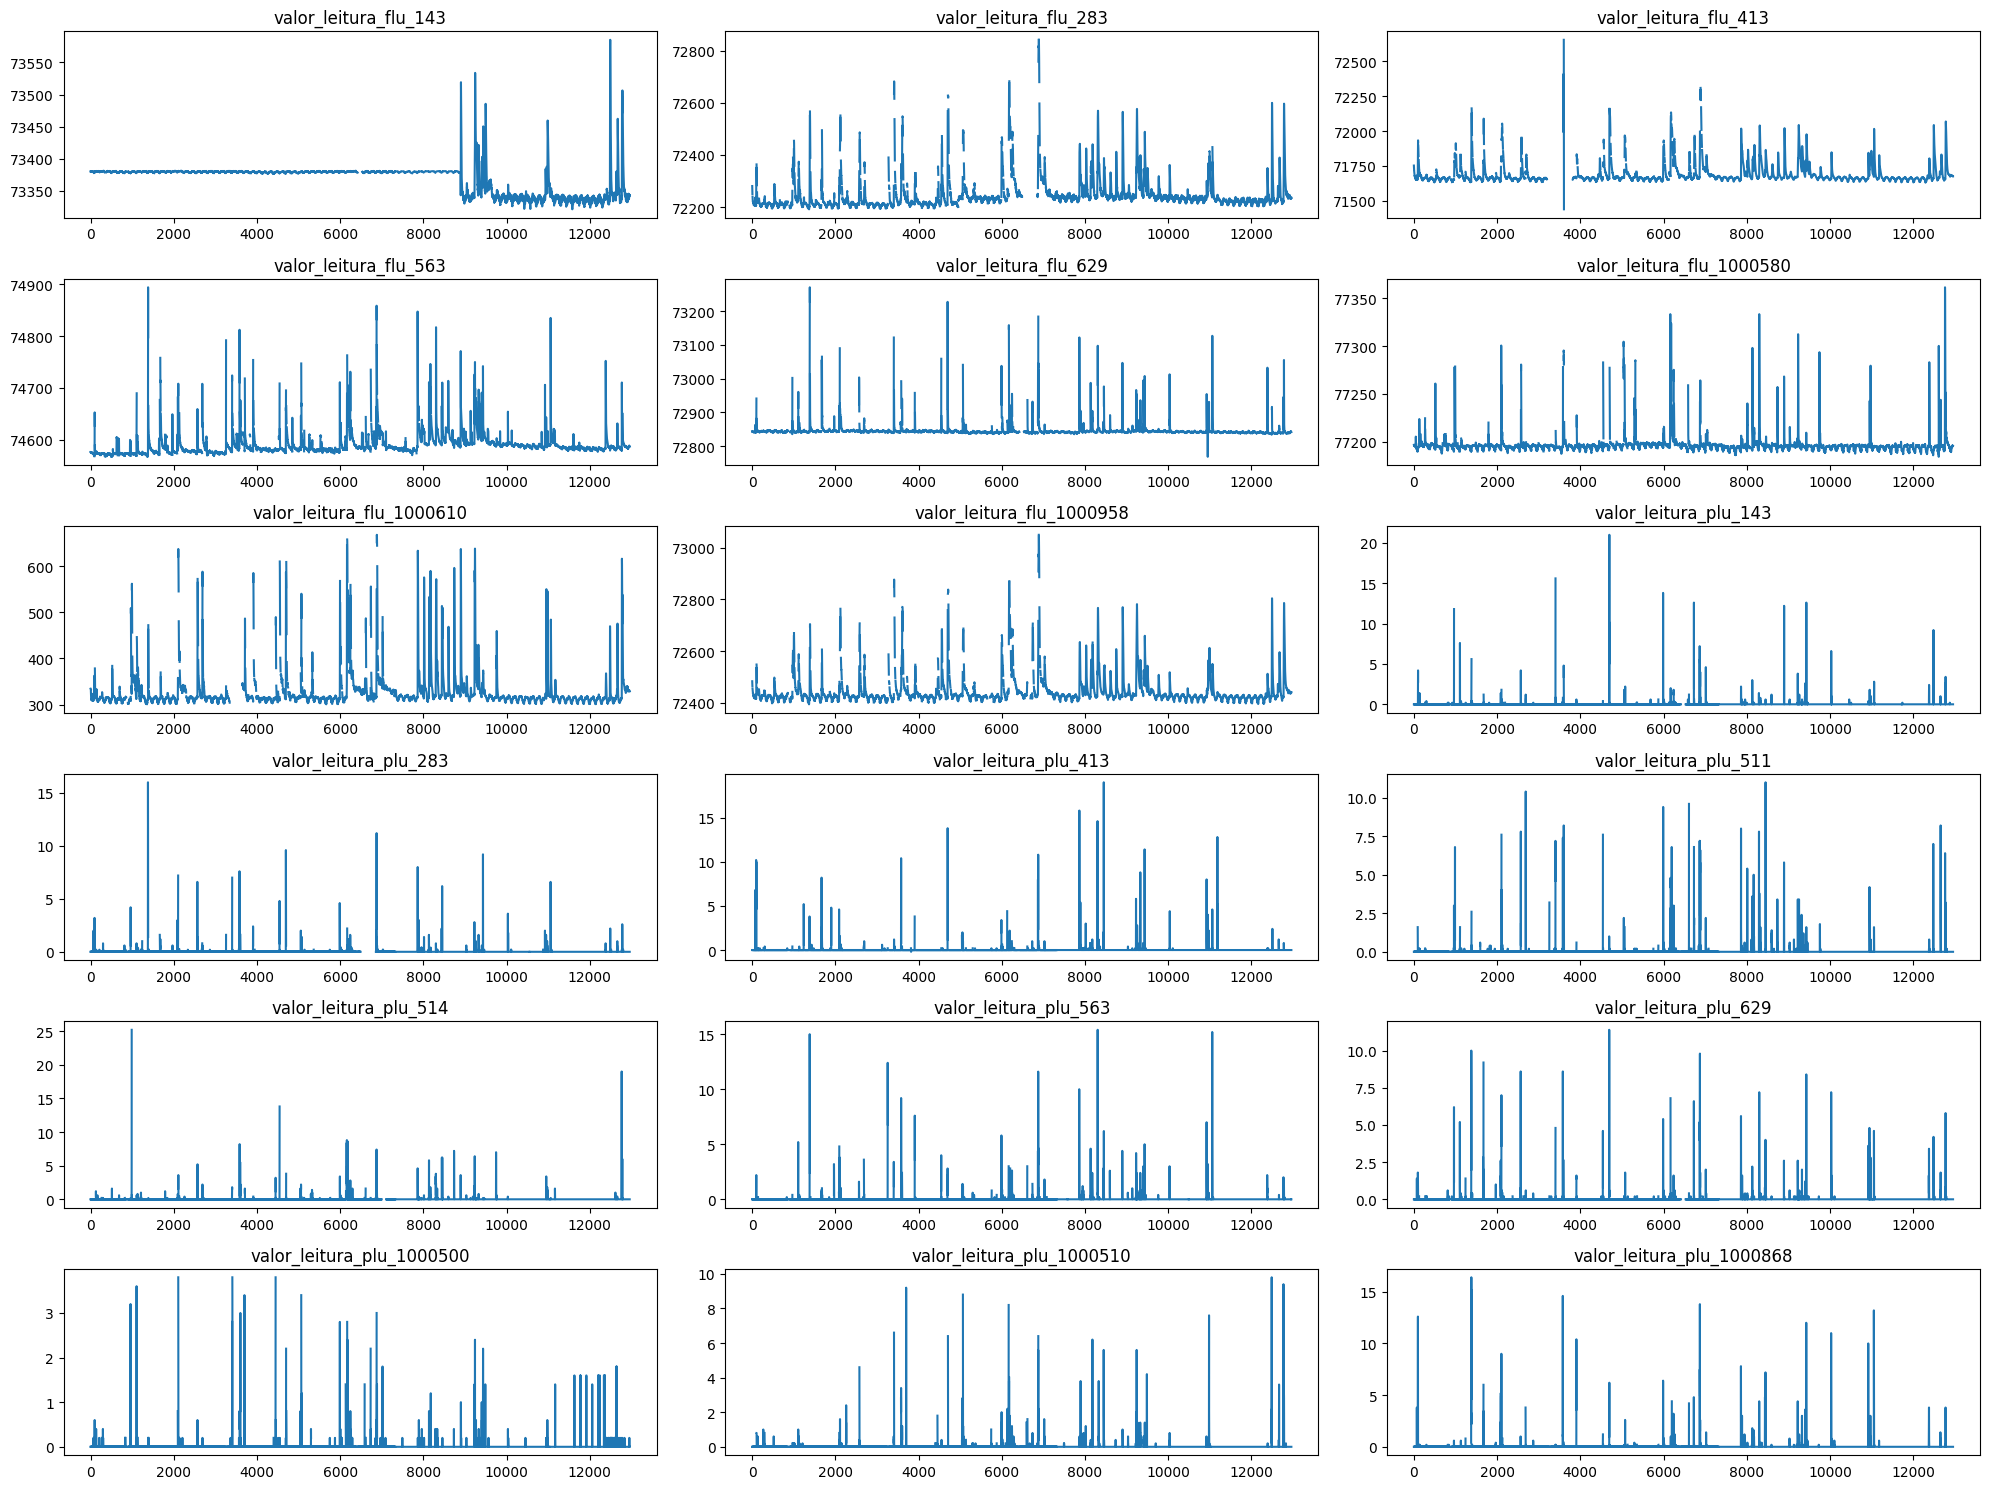

In [67]:
plt.figure(figsize=(20,15))
for i in range(18):
  plt.subplot(6, 3, i+1)
  plt.plot(df_2021[df_2021.columns[1:][i]])
  plt.title(df_2021.columns[1:][i])
  plt.tight_layout()

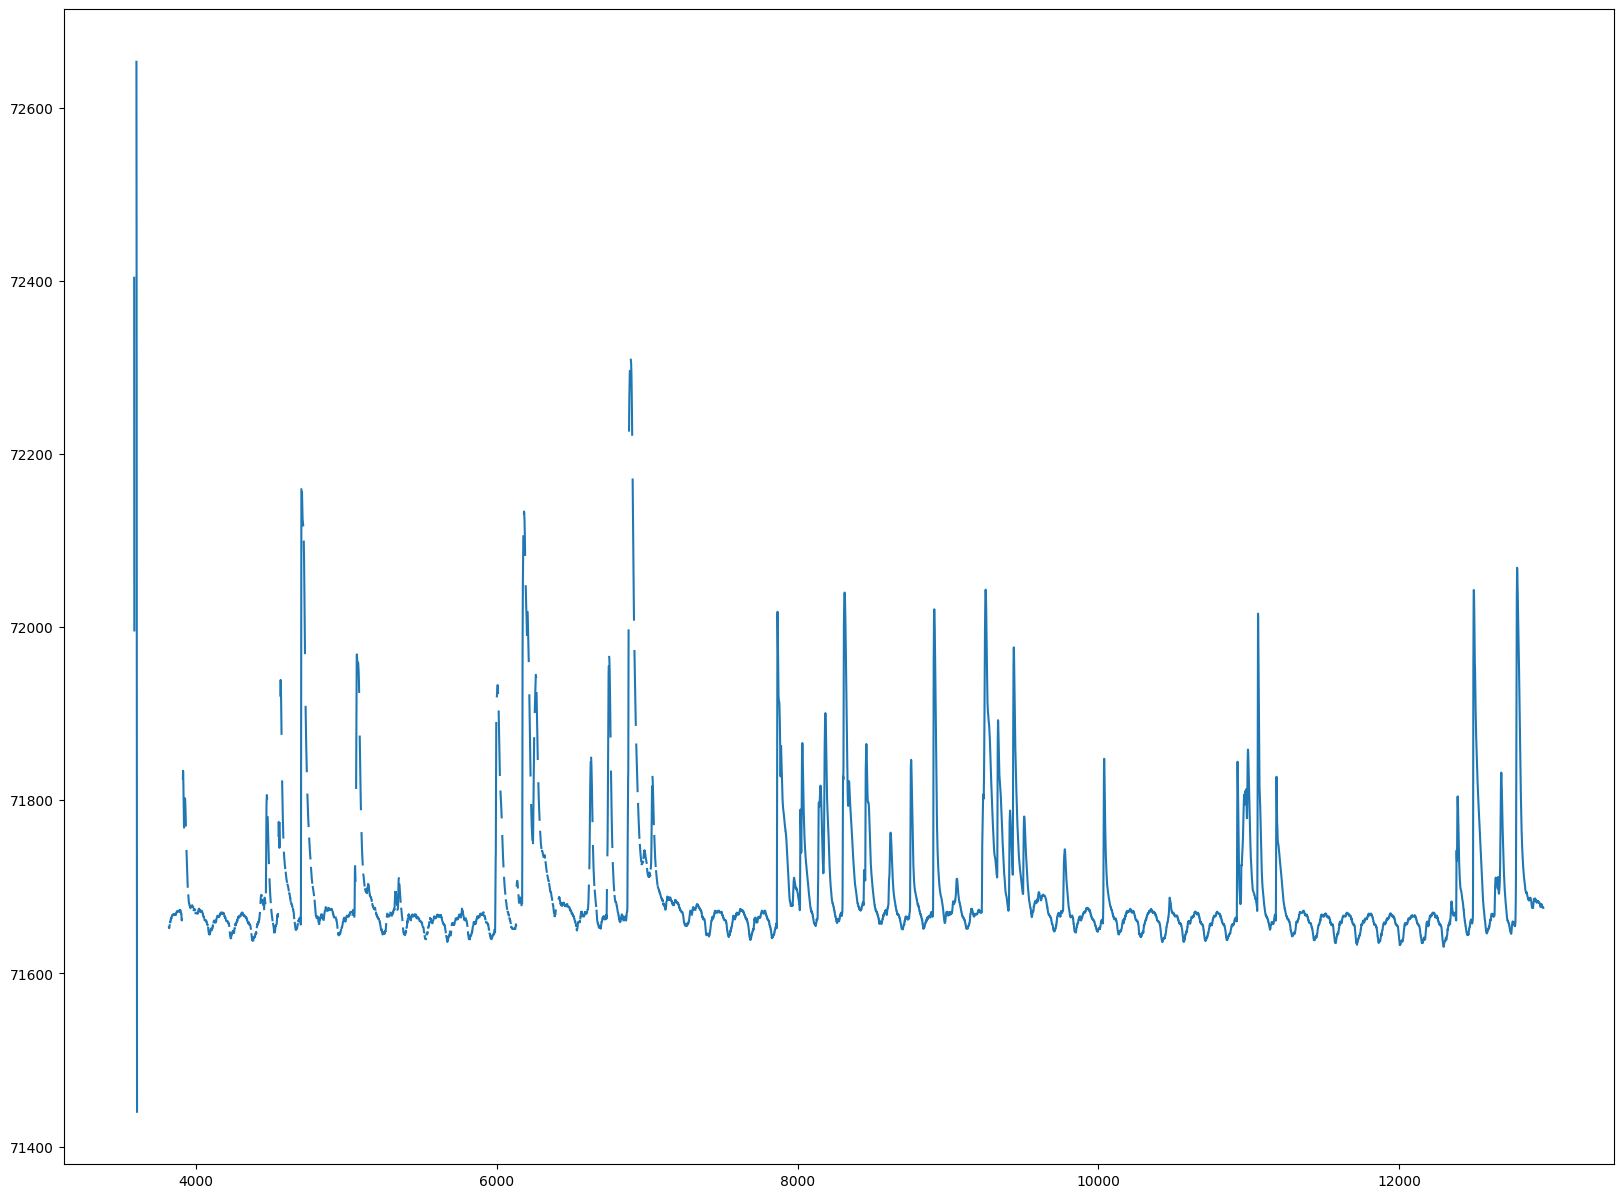

In [68]:
plt.figure(figsize=(20,15))
plt.plot(df_2021['valor_leitura_flu_413'][3500:])

In [69]:
# Tratar os missing values
#Vamos usar o método de interpolação para preencher valores faltantes em todas as colunas
for column in df_2021:
  df_2021[column].interpolate(method='linear', inplace=True)

for column in df_2021:
  df_2021[column].fillna(method='bfill',inplace=True)

for column in df_2021:
  df_2021[column].fillna(method='ffill',inplace=True)

In [70]:
# Reordenar para que todos tenham a mesma ordem de colunas
df_2021 = df_2021[list(df_2018.columns)]

# 2022

In [71]:
# Dados de Rio
todas_flu_2022 = pd.read_csv ('data/Todas Fluviométricas Jan_2022 a Mar_2022.csv')

# Chuva
todas_plu_parte1_2022 = pd.read_csv ('data/Todas Pluviométricas Parte 1 Jan_2022 a Mar_2022.csv')
todas_plu_parte2_2022 = pd.read_csv ('data/Todas Pluviométricas Parte 2 Jan_2022 a Mar_2022.csv')
todas_plu_parte3_2022 = pd.read_csv ('data/Todas Pluviométricas Parte 3 Jan_2022 a Mar_2022.csv')
todas_plu_parte4_2022 = pd.read_csv ('data/Todas Pluviométricas Parte 4 Jan_2022 a Mar_2022.csv')

In [72]:
# Lista de Estações
lista_estacoes_flu_2022 = todas_flu_2022['prefixo'].unique()
lista_estacoes_plu_parte1_2022 = todas_plu_parte1_2022['prefixo'].unique()
lista_estacoes_plu_parte2_2022 = todas_plu_parte2_2022['prefixo'].unique()
lista_estacoes_plu_parte3_2022 = todas_plu_parte3_2022['prefixo'].unique()
lista_estacoes_plu_parte4_2022 = todas_plu_parte4_2022['prefixo'].unique()

In [73]:
# Tratar dos horários anômalos
horario_inicial = dp.parse(todas_flu_2022[todas_flu_2022['prefixo']==413]['intervalo'][116435])
horario = horario_inicial
horario_string = horario.strftime("%Y-%m-%d %H:%M:%S UTC")

df_horarios = pd.DataFrame(columns=['intervalo'])
for i in range(12960):
  df_horarios.loc[i] = [horario_string]
  horario = horario + timedelta(minutes=10)
  horario_string = horario.strftime("%Y-%m-%d %H:%M:%S UTC")

horarios_anomalos = []
quantidade_estacoes = len(lista_estacoes_flu_2022)
for j in range(quantidade_estacoes):
  for i in todas_flu_2022[todas_flu_2022['prefixo']==lista_estacoes_flu_2022[j]].reset_index(drop=True)['intervalo']:
    if i not in df_horarios['intervalo'].values.tolist():
      #print(i)
      horarios_anomalos.append(i)
quantidade_estacoes = len(lista_estacoes_plu_parte1_2022)
for j in range(quantidade_estacoes):
  for i in todas_plu_parte1_2022[todas_plu_parte1_2022['prefixo']==lista_estacoes_plu_parte1_2022[j]].reset_index(drop=True)['intervalo']:
    if i not in df_horarios['intervalo'].values.tolist():
      #print(i)
      horarios_anomalos.append(i)
quantidade_estacoes = len(lista_estacoes_plu_parte2_2022)
for j in range(quantidade_estacoes):
  for i in todas_plu_parte2_2022[todas_plu_parte2_2022['prefixo']==lista_estacoes_plu_parte2_2022[j]].reset_index(drop=True)['intervalo']:
    if i not in df_horarios['intervalo'].values.tolist():
      #print(i)
      horarios_anomalos.append(i)
quantidade_estacoes = len(lista_estacoes_plu_parte3_2022)
for j in range(quantidade_estacoes):
  for i in todas_plu_parte3_2022[todas_plu_parte3_2022['prefixo']==lista_estacoes_plu_parte3_2022[j]].reset_index(drop=True)['intervalo']:
    if i not in df_horarios['intervalo'].values.tolist():
      #print(i)
      horarios_anomalos.append(i)
quantidade_estacoes = len(lista_estacoes_plu_parte4_2022)
for j in range(quantidade_estacoes):
  for i in todas_plu_parte4_2022[todas_plu_parte4_2022['prefixo']==lista_estacoes_plu_parte4_2022[j]].reset_index(drop=True)['intervalo']:
    if i not in df_horarios['intervalo'].values.tolist():
      #print(i)
      horarios_anomalos.append(i)

horarios_anomalos

['2022-01-18 11:47:00 UTC']

In [74]:
# Remoção das linhas com horários anômalos
for i in range(len(horarios_anomalos)):
  todas_flu_2022 = todas_flu_2022[todas_flu_2022.intervalo != horarios_anomalos[i]]
  todas_plu_parte1_2022 = todas_plu_parte1_2022[todas_plu_parte1_2022.intervalo != horarios_anomalos[i]]
  todas_plu_parte2_2022 = todas_plu_parte2_2022[todas_plu_parte2_2022.intervalo != horarios_anomalos[i]]
  todas_plu_parte3_2022 = todas_plu_parte3_2022[todas_plu_parte3_2022.intervalo != horarios_anomalos[i]]
  todas_plu_parte4_2022 = todas_plu_parte4_2022[todas_plu_parte4_2022.intervalo != horarios_anomalos[i]]

In [75]:
# Verificar quantidade de dados faltantes
# Rios
print("Séries de Rios")
for j in range(len(lista_estacoes_flu_2022)):
  comprimento = len(todas_flu_2022[todas_flu_2022['prefixo']==lista_estacoes_flu_2022[j]])
  print(f"Percentual de dados faltantes na série {lista_estacoes_flu_2022[j]}: {(1-comprimento/12960)*100}")

# Chuva
print('\n')
print('Séries de Chuva')
for j in range(len(lista_estacoes_plu_parte1_2022)):
  comprimento = len(todas_plu_parte1_2022[todas_plu_parte1_2022['prefixo']==lista_estacoes_plu_parte1_2022[j]])
  print(f"Percentual de dados faltantes na série {lista_estacoes_plu_parte1_2022[j]}: {(1-comprimento/12960)*100}")
for j in range(len(lista_estacoes_plu_parte2_2022)):
  comprimento = len(todas_plu_parte2_2022[todas_plu_parte2_2022['prefixo']==lista_estacoes_plu_parte2_2022[j]])
  print(f"Percentual de dados faltantes na série {lista_estacoes_plu_parte2_2022[j]}: {(1-comprimento/12960)*100}")
for j in range(len(lista_estacoes_plu_parte3_2022)):
  comprimento = len(todas_plu_parte3_2022[todas_plu_parte3_2022['prefixo']==lista_estacoes_plu_parte3_2022[j]])
  print(f"Percentual de dados faltantes na série {lista_estacoes_plu_parte3_2022[j]}: {(1-comprimento/12960)*100}")
for j in range(len(lista_estacoes_plu_parte4_2022)):
  comprimento = len(todas_plu_parte4_2022[todas_plu_parte4_2022['prefixo']==lista_estacoes_plu_parte4_2022[j]])
  print(f"Percentual de dados faltantes na série {lista_estacoes_plu_parte4_2022[j]}: {(1-comprimento/12960)*100}")

Séries de Rios
Percentual de dados faltantes na série 1000370: 89.45216049382717
Percentual de dados faltantes na série 1000410: 89.45216049382717
Percentual de dados faltantes na série 1000430: 89.45987654320989
Percentual de dados faltantes na série 1000490: 89.45216049382717
Percentual de dados faltantes na série 1000580: 1.165123456790118
Percentual de dados faltantes na série 1000610: 1.4583333333333282
Percentual de dados faltantes na série 1000817: 1.1805555555555514
Percentual de dados faltantes na série 1000958: 6.134259259259256
Percentual de dados faltantes na série 1000959: 3.125
Percentual de dados faltantes na série 143: 1.2268518518518512
Percentual de dados faltantes na série 157: 1.1882716049382736
Percentual de dados faltantes na série 279: 37.376543209876544
Percentual de dados faltantes na série 280: 89.45216049382717
Percentual de dados faltantes na série 283: 1.4583333333333282
Percentual de dados faltantes na série 413: 1.1805555555555514
Percentual de dados falt

In [76]:
# Unir os dados em um dataframe único
df_list = []
for i in range(len(lista_estacoes_flu_2022)):
  df_list.append(todas_flu_2022[todas_flu_2022['prefixo']==lista_estacoes_flu_2022[i]].reset_index(drop=True)[['valor_leitura_flu','intervalo']])
for i in range(len(lista_estacoes_plu_parte1_2022)):
  df_list.append(todas_plu_parte1_2022[todas_plu_parte1_2022['prefixo']==lista_estacoes_plu_parte1_2022[i]].reset_index(drop=True)[['valor_leitura_plu','intervalo']])
for i in range(len(lista_estacoes_plu_parte2_2022)):
  df_list.append(todas_plu_parte2_2022[todas_plu_parte2_2022['prefixo']==lista_estacoes_plu_parte2_2022[i]].reset_index(drop=True)[['valor_leitura_plu','intervalo']])
for i in range(len(lista_estacoes_plu_parte3_2022)):
  df_list.append(todas_plu_parte3_2022[todas_plu_parte3_2022['prefixo']==lista_estacoes_plu_parte3_2022[i]].reset_index(drop=True)[['valor_leitura_plu','intervalo']])
for i in range(len(lista_estacoes_plu_parte4_2022)):
  df_list.append(todas_plu_parte4_2022[todas_plu_parte4_2022['prefixo']==lista_estacoes_plu_parte4_2022[i]].reset_index(drop=True)[['valor_leitura_plu','intervalo']])

#Vamos juntar todos os dataframes em um único
df_merged_2022 = df_horarios
for i in range(len(df_list)):
  df_merged_2022 = pd.merge(df_merged_2022,df_list[i],on='intervalo',how='outer',sort=True)

/var/folders/42/r82q94mx2mn34pcn5mfpgb_00000gn/T/ipykernel_10449/4120907932.py:17: FutureWarning: Passing 'suffixes' which cause duplicate columns {'valor_leitura_flu_x'} in the result is deprecated and will raise a MergeError in a future version.
  df_merged_2022 = pd.merge(df_merged_2022,df_list[i],on='intervalo',how='outer',sort=True)
/var/folders/42/r82q94mx2mn34pcn5mfpgb_00000gn/T/ipykernel_10449/4120907932.py:17: FutureWarning: Passing 'suffixes' which cause duplicate columns {'valor_leitura_flu_x'} in the result is deprecated and will raise a MergeError in a future version.
  df_merged_2022 = pd.merge(df_merged_2022,df_list[i],on='intervalo',how='outer',sort=True)
/var/folders/42/r82q94mx2mn34pcn5mfpgb_00000gn/T/ipykernel_10449/4120907932.py:17: FutureWarning: Passing 'suffixes' which cause duplicate columns {'valor_leitura_flu_x'} in the result is deprecated and will raise a MergeError in a future version.
  df_merged_2022 = pd.merge(df_merged_2022,df_list[i],on='intervalo',how

In [77]:
nomes_colunas = ['intervalo']
for i in range(len(lista_estacoes_flu_2022)):
  nomes_colunas.append('valor_leitura_flu_' + str(lista_estacoes_flu_2022[i]))
for i in range(len(lista_estacoes_plu_parte1_2022)):
  nomes_colunas.append('valor_leitura_plu_' + str(lista_estacoes_plu_parte1_2022[i]))
for i in range(len(lista_estacoes_plu_parte2_2022)):
  nomes_colunas.append('valor_leitura_plu_' + str(lista_estacoes_plu_parte2_2022[i]))
for i in range(len(lista_estacoes_plu_parte3_2022)):
  nomes_colunas.append('valor_leitura_plu_' + str(lista_estacoes_plu_parte3_2022[i]))
for i in range(len(lista_estacoes_plu_parte4_2022)):
  nomes_colunas.append('valor_leitura_plu_' + str(lista_estacoes_plu_parte4_2022[i]))

In [78]:
#Mudando o nome das colunas
df_merged_2022.columns = nomes_colunas
# Filtrando para usar apenas os campos desejados
df_2022 = df_merged_2022.filter(['intervalo','valor_leitura_flu_143','valor_leitura_flu_283','valor_leitura_flu_413','valor_leitura_flu_563','valor_leitura_flu_629','valor_leitura_flu_1000580','valor_leitura_flu_1000610','valor_leitura_flu_1000958','valor_leitura_plu_143','valor_leitura_plu_283','valor_leitura_plu_413','valor_leitura_plu_511','valor_leitura_plu_514','valor_leitura_plu_563','valor_leitura_plu_629','valor_leitura_plu_1000500','valor_leitura_plu_1000510','valor_leitura_plu_1000868'], axis=1)

In [79]:
df_2022

intervalo  valor_leitura_flu_143  valor_leitura_flu_283  \
0      2022-01-01 03:00:00 UTC                73362.0                72395.0   
1      2022-01-01 03:10:00 UTC                73361.0                72395.0   
2      2022-01-01 03:20:00 UTC                73357.0                72395.0   
3      2022-01-01 03:30:00 UTC                73358.0                72395.0   
4      2022-01-01 03:40:00 UTC                73354.0                72395.0   
...                        ...                    ...                    ...   
12955  2022-04-01 02:10:00 UTC                73409.0                72247.0   
12956  2022-04-01 02:20:00 UTC                73408.0                72248.0   
12957  2022-04-01 02:30:00 UTC                73408.0                72249.0   
12958  2022-04-01 02:40:00 UTC                73407.0                72249.0   
12959  2022-04-01 02:50:00 UTC                73404.0                72249.0   

       valor_leitura_flu_413  valor_leitura_flu_563  valor_leitura_flu_629  \
0                    71753.0                74596.0                72838.0   
1                    71749.0                74596.0                72838.0   
2                    71746.0                74596.0                72838.0   
3                    71742.0                74595.0                72838.0   
4                    71739.0                74596.0                72838.0   
...                      ...                    ...                    ...   
12955                71675.0                74576.0                72840.0   
12956                71674.0                74576.0                72840.0   
12957                71675.0                74576.0                72840.0   
12958                71676.0                74576.0                72840.0   
12959                71677.0                74576.0                72839.0   

       valor_leitura_flu_1000580  valor_leitura_flu_1000610  \
0                        77250.0                      336.0   
1                        77250.0                      335.0   
2                        77250.0                      335.0   
3                        77250.0                      334.0   
4                        77250.0                      331.0   
...                          ...                        ...   
12955                    77247.0                      329.0   
12956                    77248.0                      328.0   
12957                    77247.0                      327.0   
12958                    77247.0                      326.0   
12959                    77247.0                      324.0   

       valor_leitura_flu_1000958  valor_leitura_plu_143  \
0                        72477.0                    0.0   
1                        72475.0                    0.0   
2                        72474.0                    0.0   
3                        72472.0                    0.0   
4                        72471.0                    0.0   
...                          ...                    ...   
12955                    72449.0                    0.0   
12956                    72449.0                    0.0   
12957                    72450.0                    0.0   
12958                    72451.0                    0.0   
12959                    72452.0                    0.0   

       valor_leitura_plu_283  valor_leitura_plu_413  valor_leitura_plu_511  \
0                        0.0                    0.0                    0.0   
1                        0.0                    0.0                    0.0   
2                        0.0                    0.0                    0.0   
3                        0.0                    0.0                    0.0   
4                        0.0                    0.0                    0.0   
...                      ...                    ...                    ...   
12955                    0.0                    0.0                    0.0   
12956                    0.0     

## Visualização

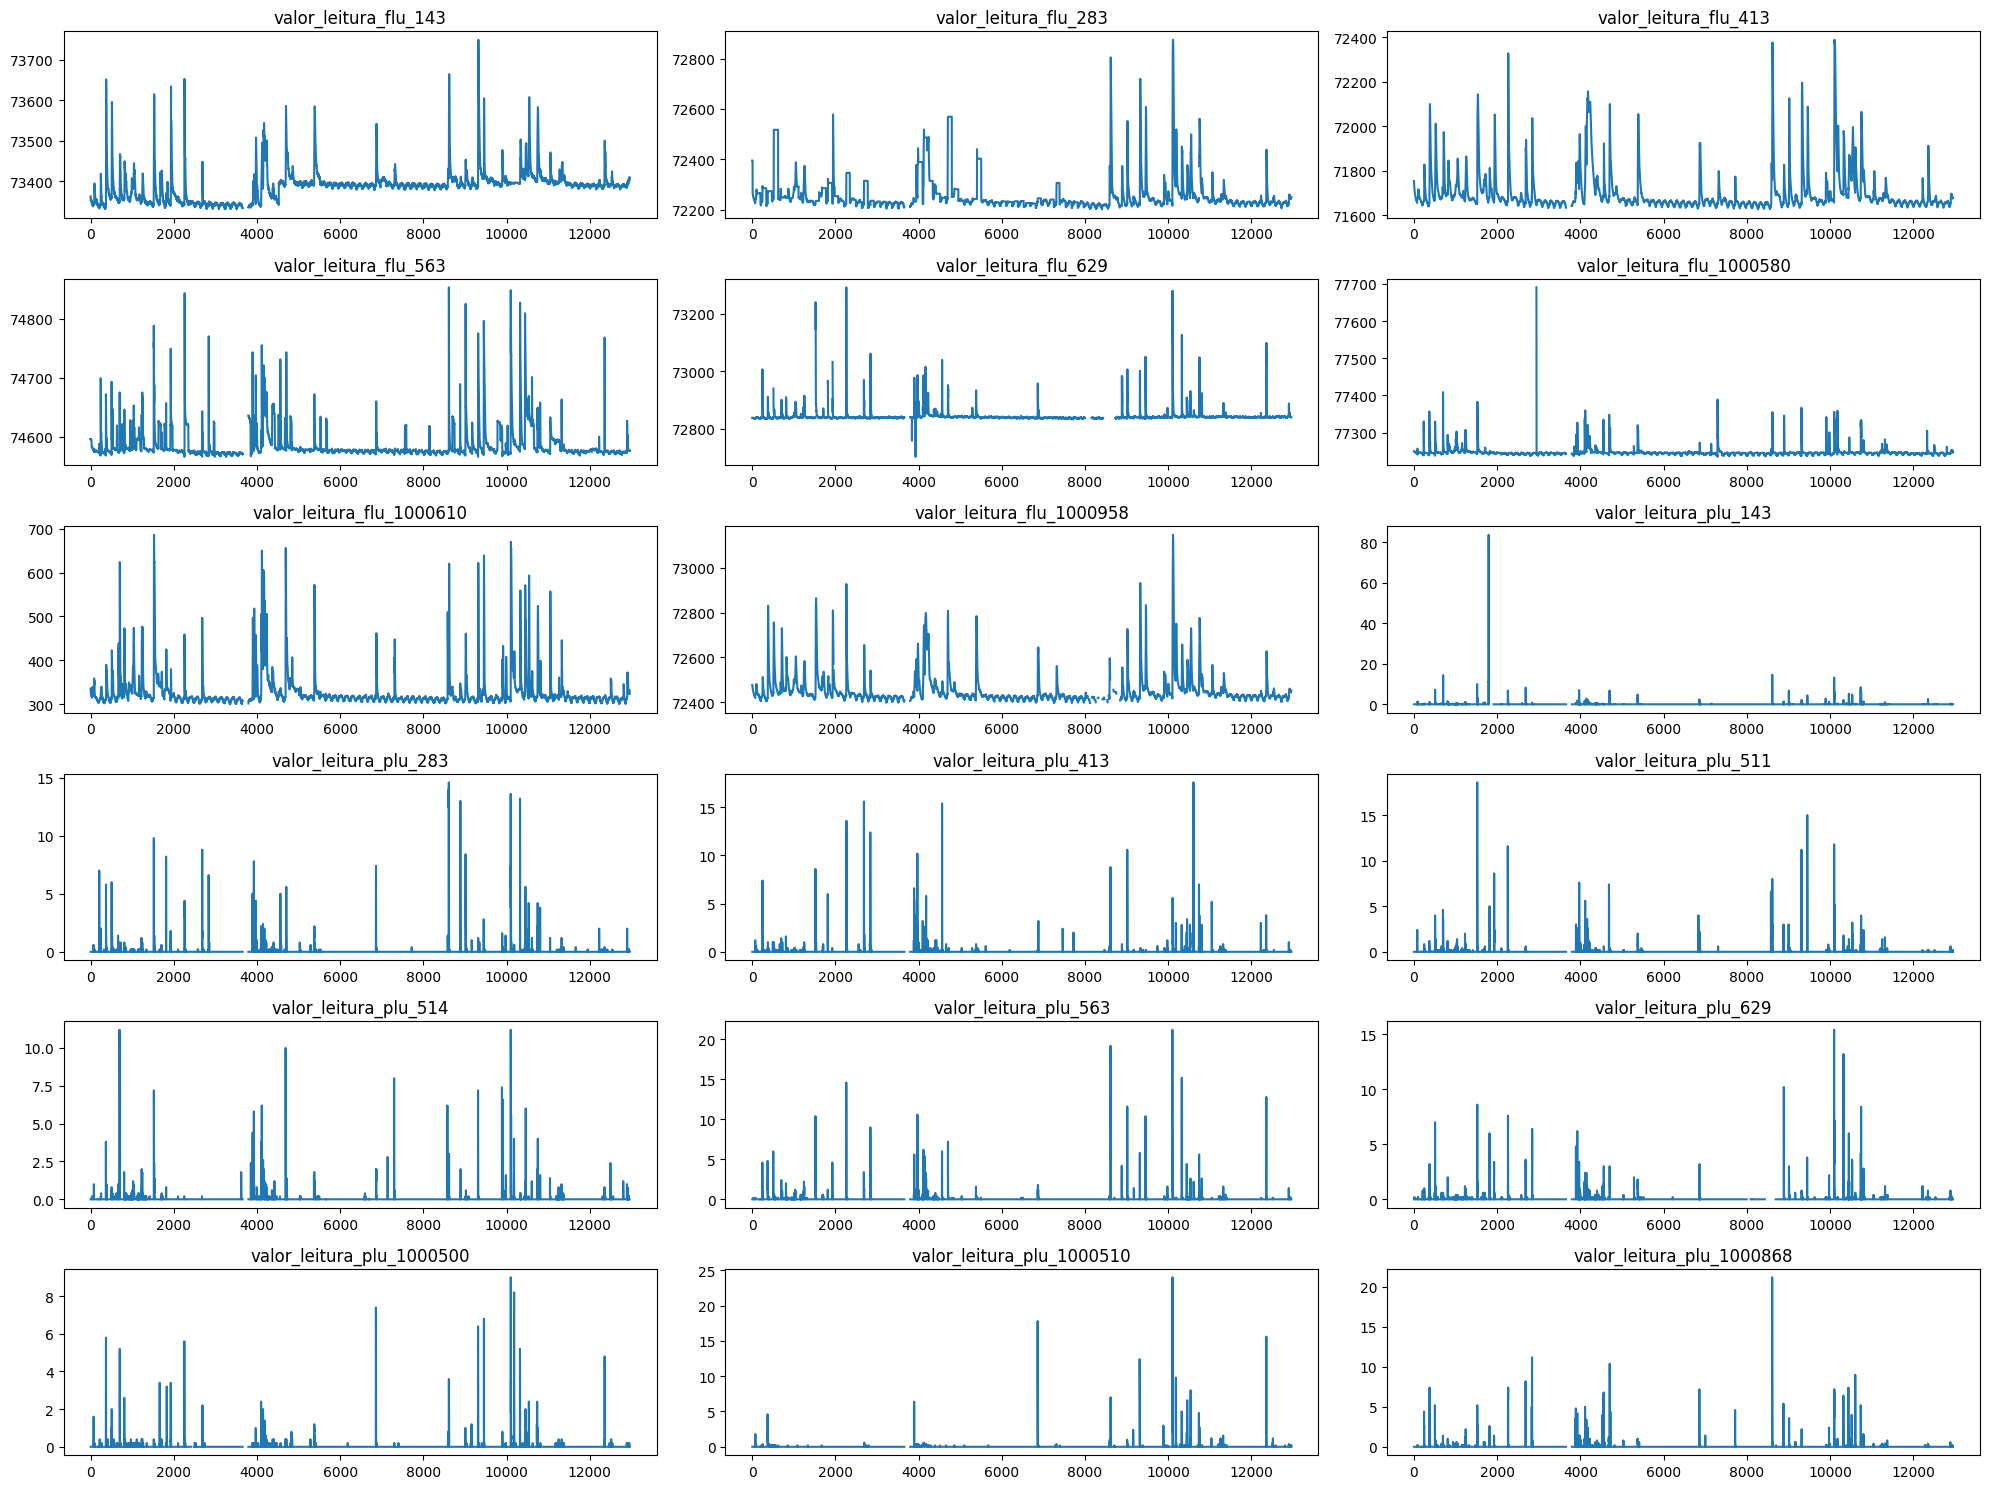

In [80]:
plt.figure(figsize=(20,15))
for i in range(18):
  plt.subplot(6, 3, i+1)
  plt.plot(df_2022[df_2021.columns[1:][i]])
  plt.title(df_2022.columns[1:][i])
  plt.tight_layout()

In [81]:
df_2022.iloc[0]

intervalo                    2022-01-01 03:00:00 UTC
valor_leitura_flu_143                        73362.0
valor_leitura_flu_283                        72395.0
valor_leitura_flu_413                        71753.0
valor_leitura_flu_563                        74596.0
valor_leitura_flu_629                        72838.0
valor_leitura_flu_1000580                    77250.0
valor_leitura_flu_1000610                      336.0
valor_leitura_flu_1000958                    72477.0
valor_leitura_plu_143                            0.0
valor_leitura_plu_283                            0.0
valor_leitura_plu_413                            0.0
valor_leitura_plu_511                            0.0
valor_leitura_plu_514                            0.0
valor_leitura_plu_563                            0.0
valor_leitura_plu_629                            0.0
valor_leitura_plu_1000500                        0.0
valor_leitura_plu_1000510                        0.0
valor_leitura_plu_1000868                     

In [82]:
# Tratar os missing values
#Vamos usar o método de interpolação para preencher valores faltantes em todas as colunas
for column in df_2022:
  if(column!='intervalo'):
    print(column)
    df_2022[column].interpolate(method='linear',inplace=True)
    #df_2022[column].fillna(method='ffill',inplace=True)

for column in df_2022:
  df_2022[column].fillna(method='bfill',inplace=True)

for column in df_2022:
  df_2022[column].fillna(method='ffill',inplace=True)

valor_leitura_flu_143
valor_leitura_flu_283
valor_leitura_flu_413
valor_leitura_flu_563
valor_leitura_flu_629
valor_leitura_flu_1000580
valor_leitura_flu_1000610
valor_leitura_flu_1000958
valor_leitura_plu_143
valor_leitura_plu_283
valor_leitura_plu_413
valor_leitura_plu_511
valor_leitura_plu_514
valor_leitura_plu_563
valor_leitura_plu_629
valor_leitura_plu_1000500
valor_leitura_plu_1000510
valor_leitura_plu_1000868


In [83]:
# Reordenar para que todos tenham a mesma ordem de colunas
df_2022 = df_2022[list(df_2018.columns)]

# 2023

In [84]:
# Dados de Rio
todas_flu_parte1_2023 = pd.read_csv ('data/Todas Fluviométricas Parte 1 Jan_2023 a Mar_2023.csv')
todas_flu_parte2_2023 = pd.read_csv ('data/Todas Fluviométricas Parte 2 Jan_2023 a Mar_2023.csv')
# Chuva
todas_plu_parte1_2023 = pd.read_csv ('data/Todas Pluviométricas Parte 1 Jan_2023 a Mar_2023.csv')
todas_plu_parte2_2023 = pd.read_csv ('data/Todas Pluviométricas Parte 2 Jan_2023 a Mar_2023.csv')
todas_plu_parte3_2023 = pd.read_csv ('data/Todas Pluviométricas Parte 3 Jan_2023 a Mar_2023.csv')
todas_plu_parte4_2023 = pd.read_csv ('data/Todas Pluviométricas Parte 4 Jan_2023 a Mar_2023.csv')

In [85]:
# Lista de Estações
lista_estacoes_flu_parte1_2023 = todas_flu_parte1_2023['prefixo'].unique()
lista_estacoes_flu_parte2_2023 = todas_flu_parte2_2023['prefixo'].unique()
lista_estacoes_plu_parte1_2023 = todas_plu_parte1_2023['prefixo'].unique()
lista_estacoes_plu_parte2_2023 = todas_plu_parte2_2023['prefixo'].unique()
lista_estacoes_plu_parte3_2023 = todas_plu_parte3_2023['prefixo'].unique()
lista_estacoes_plu_parte4_2023 = todas_plu_parte4_2023['prefixo'].unique()

In [86]:
# Verificar quantidade de dados faltantes
# Rios
print("Séries de Rios")
for j in range(len(lista_estacoes_flu_parte1_2023)):
  comprimento = len(todas_flu_parte1_2023[todas_flu_parte1_2023['prefixo']==lista_estacoes_flu_parte1_2023[j]])
  print(f"Percentual de dados faltantes na série {lista_estacoes_flu_parte1_2023[j]}: {(1-comprimento/12960)*100}")
for j in range(len(lista_estacoes_flu_parte2_2023)):
  comprimento = len(todas_flu_parte2_2023[todas_flu_parte2_2023['prefixo']==lista_estacoes_flu_parte2_2023[j]])
  print(f"Percentual de dados faltantes na série {lista_estacoes_flu_parte2_2023[j]}: {(1-comprimento/12960)*100}")


# Chuva
print('\n')
print('Séries de Chuva')
for j in range(len(lista_estacoes_plu_parte1_2023)):
  comprimento = len(todas_plu_parte1_2023[todas_plu_parte1_2023['prefixo']==lista_estacoes_plu_parte1_2023[j]])
  print(f"Percentual de dados faltantes na série {lista_estacoes_plu_parte1_2023[j]}: {(1-comprimento/12960)*100}")
for j in range(len(lista_estacoes_plu_parte2_2023)):
  comprimento = len(todas_plu_parte2_2023[todas_plu_parte2_2023['prefixo']==lista_estacoes_plu_parte2_2023[j]])
  print(f"Percentual de dados faltantes na série {lista_estacoes_plu_parte2_2023[j]}: {(1-comprimento/12960)*100}")
for j in range(len(lista_estacoes_plu_parte3_2023)):
  comprimento = len(todas_plu_parte3_2023[todas_plu_parte3_2023['prefixo']==lista_estacoes_plu_parte3_2023[j]])
  print(f"Percentual de dados faltantes na série {lista_estacoes_plu_parte3_2023[j]}: {(1-comprimento/12960)*100}")
for j in range(len(lista_estacoes_plu_parte4_2023)):
  comprimento = len(todas_plu_parte4_2023[todas_plu_parte4_2023['prefixo']==lista_estacoes_plu_parte4_2023[j]])
  print(f"Percentual de dados faltantes na série {lista_estacoes_plu_parte4_2023[j]}: {(1-comprimento/12960)*100}")

Séries de Rios
Percentual de dados faltantes na série 143: 0.15432098765432167
Percentual de dados faltantes na série 279: 0.1311728395061773
Percentual de dados faltantes na série 280: 6.25
Percentual de dados faltantes na série 283: 0.16975308641975495
Percentual de dados faltantes na série 413: 0.09259259259258856
Percentual de dados faltantes na série 563: 0.30864197530864335
Percentual de dados faltantes na série 629: 0.16975308641975495
Percentual de dados faltantes na série 1000370: 0.0694444444444442
Percentual de dados faltantes na série 1000410: 0.10802469135802184
Percentual de dados faltantes na série 1000430: 0.10030864197531075
Percentual de dados faltantes na série 1000490: 0.2083333333333326
Percentual de dados faltantes na série 1000580: 0.10802469135802184
Percentual de dados faltantes na série 1000610: 0.10030864197531075
Percentual de dados faltantes na série 1000958: 0.10802469135802184
Percentual de dados faltantes na série 1000959: 7.314814814814818


Séries de C

In [87]:
# Tratar dos horários anômalos
horario_inicial = dp.parse(todas_flu_parte1_2023['intervalo'][0])
horario = horario_inicial
horario_string = horario.strftime("%Y-%m-%d %H:%M:%S UTC")

df_horarios = pd.DataFrame(columns=['intervalo'])
for i in range(12960):
  df_horarios.loc[i] = [horario_string]
  horario = horario + timedelta(minutes=10)
  horario_string = horario.strftime("%Y-%m-%d %H:%M:%S UTC")

horarios_anomalos = []
quantidade_estacoes = len(lista_estacoes_flu_parte1_2023)
for j in range(quantidade_estacoes):
  for i in todas_flu_parte1_2023[todas_flu_parte1_2023['prefixo']==lista_estacoes_flu_parte1_2023[j]].reset_index(drop=True)['intervalo']:
    if i not in df_horarios['intervalo'].values.tolist():
      #print(i)
      horarios_anomalos.append(i)
quantidade_estacoes = len(lista_estacoes_flu_parte2_2023)
for j in range(quantidade_estacoes):
  for i in todas_flu_parte2_2023[todas_flu_parte2_2023['prefixo']==lista_estacoes_flu_parte2_2023[j]].reset_index(drop=True)['intervalo']:
    if i not in df_horarios['intervalo'].values.tolist():
      #print(i)
      horarios_anomalos.append(i)
quantidade_estacoes = len(lista_estacoes_plu_parte1_2023)
for j in range(quantidade_estacoes):
  for i in todas_plu_parte1_2023[todas_plu_parte1_2023['prefixo']==lista_estacoes_plu_parte1_2023[j]].reset_index(drop=True)['intervalo']:
    if i not in df_horarios['intervalo'].values.tolist():
      #print(i)
      horarios_anomalos.append(i)
quantidade_estacoes = len(lista_estacoes_plu_parte2_2023)
for j in range(quantidade_estacoes):
  for i in todas_plu_parte2_2023[todas_plu_parte2_2023['prefixo']==lista_estacoes_plu_parte2_2023[j]].reset_index(drop=True)['intervalo']:
    if i not in df_horarios['intervalo'].values.tolist():
      #print(i)
      horarios_anomalos.append(i)
quantidade_estacoes = len(lista_estacoes_plu_parte3_2023)
for j in range(quantidade_estacoes):
  for i in todas_plu_parte3_2023[todas_plu_parte3_2023['prefixo']==lista_estacoes_plu_parte3_2023[j]].reset_index(drop=True)['intervalo']:
    if i not in df_horarios['intervalo'].values.tolist():
      #print(i)
      horarios_anomalos.append(i)
quantidade_estacoes = len(lista_estacoes_plu_parte4_2023)
for j in range(quantidade_estacoes):
  for i in todas_plu_parte4_2023[todas_plu_parte4_2023['prefixo']==lista_estacoes_plu_parte4_2023[j]].reset_index(drop=True)['intervalo']:
    if i not in df_horarios['intervalo'].values.tolist():
      #print(i)
      horarios_anomalos.append(i)

horarios_anomalos

['2023-02-06 13:53:00 UTC', '2023-02-08 13:32:00 UTC']

In [88]:
# Remoção das linhas com horários anômalos
for i in range(len(horarios_anomalos)):
  todas_flu_parte1_2023 = todas_flu_parte1_2023[todas_flu_parte1_2023.intervalo != horarios_anomalos[i]]
  todas_flu_parte2_2023 = todas_flu_parte2_2023[todas_flu_parte2_2023.intervalo != horarios_anomalos[i]]
  todas_plu_parte1_2023 = todas_plu_parte1_2023[todas_plu_parte1_2023.intervalo != horarios_anomalos[i]]
  todas_plu_parte2_2023 = todas_plu_parte2_2023[todas_plu_parte2_2023.intervalo != horarios_anomalos[i]]
  todas_plu_parte3_2023 = todas_plu_parte3_2023[todas_plu_parte3_2023.intervalo != horarios_anomalos[i]]
  todas_plu_parte4_2023 = todas_plu_parte4_2023[todas_plu_parte4_2023.intervalo != horarios_anomalos[i]]

In [89]:
# Unir os dados em um dataframe único
df_list = []
for i in range(len(lista_estacoes_flu_parte1_2023)):
  df_list.append(todas_flu_parte1_2023[todas_flu_parte1_2023['prefixo']==lista_estacoes_flu_parte1_2023[i]].reset_index(drop=True)[['valor_leitura_flu','intervalo']])
for i in range(len(lista_estacoes_flu_parte2_2023)):
  df_list.append(todas_flu_parte2_2023[todas_flu_parte2_2023['prefixo']==lista_estacoes_flu_parte2_2023[i]].reset_index(drop=True)[['valor_leitura_flu','intervalo']])
for i in range(len(lista_estacoes_plu_parte1_2023)):
  df_list.append(todas_plu_parte1_2023[todas_plu_parte1_2023['prefixo']==lista_estacoes_plu_parte1_2023[i]].reset_index(drop=True)[['valor_leitura_plu','intervalo']])
for i in range(len(lista_estacoes_plu_parte2_2023)):
  df_list.append(todas_plu_parte2_2023[todas_plu_parte2_2023['prefixo']==lista_estacoes_plu_parte2_2023[i]].reset_index(drop=True)[['valor_leitura_plu','intervalo']])
for i in range(len(lista_estacoes_plu_parte3_2023)):
  df_list.append(todas_plu_parte3_2023[todas_plu_parte3_2023['prefixo']==lista_estacoes_plu_parte3_2023[i]].reset_index(drop=True)[['valor_leitura_plu','intervalo']])
for i in range(len(lista_estacoes_plu_parte4_2023)):
  df_list.append(todas_plu_parte4_2023[todas_plu_parte4_2023['prefixo']==lista_estacoes_plu_parte4_2023[i]].reset_index(drop=True)[['valor_leitura_plu','intervalo']])

#Vamos juntar todos os dataframes em um único
df_merged_2023 = df_horarios
for i in range(len(df_list)):
  df_merged_2023 = pd.merge(df_merged_2023,df_list[i],on='intervalo',how='outer',sort=True)

/var/folders/42/r82q94mx2mn34pcn5mfpgb_00000gn/T/ipykernel_10449/3415366380.py:19: FutureWarning: Passing 'suffixes' which cause duplicate columns {'valor_leitura_flu_x'} in the result is deprecated and will raise a MergeError in a future version.
  df_merged_2023 = pd.merge(df_merged_2023,df_list[i],on='intervalo',how='outer',sort=True)
/var/folders/42/r82q94mx2mn34pcn5mfpgb_00000gn/T/ipykernel_10449/3415366380.py:19: FutureWarning: Passing 'suffixes' which cause duplicate columns {'valor_leitura_flu_x'} in the result is deprecated and will raise a MergeError in a future version.
  df_merged_2023 = pd.merge(df_merged_2023,df_list[i],on='intervalo',how='outer',sort=True)
/var/folders/42/r82q94mx2mn34pcn5mfpgb_00000gn/T/ipykernel_10449/3415366380.py:19: FutureWarning: Passing 'suffixes' which cause duplicate columns {'valor_leitura_flu_x'} in the result is deprecated and will raise a MergeError in a future version.
  df_merged_2023 = pd.merge(df_merged_2023,df_list[i],on='intervalo',how

In [90]:
nomes_colunas = ['intervalo']
for i in range(len(lista_estacoes_flu_parte1_2023)):
  nomes_colunas.append('valor_leitura_flu_' + str(lista_estacoes_flu_parte1_2023[i]))
for i in range(len(lista_estacoes_flu_parte2_2023)):
  nomes_colunas.append('valor_leitura_flu_' + str(lista_estacoes_flu_parte2_2023[i]))
for i in range(len(lista_estacoes_plu_parte1_2023)):
  nomes_colunas.append('valor_leitura_plu_' + str(lista_estacoes_plu_parte1_2023[i]))
for i in range(len(lista_estacoes_plu_parte2_2023)):
  nomes_colunas.append('valor_leitura_plu_' + str(lista_estacoes_plu_parte2_2023[i]))
for i in range(len(lista_estacoes_plu_parte3_2023)):
  nomes_colunas.append('valor_leitura_plu_' + str(lista_estacoes_plu_parte3_2023[i]))
for i in range(len(lista_estacoes_plu_parte4_2023)):
  nomes_colunas.append('valor_leitura_plu_' + str(lista_estacoes_plu_parte4_2023[i]))

In [91]:
#Mudando o nome das colunas
df_merged_2023.columns = nomes_colunas
# Filtrando para usar apenas os campos desejados
df_2023 = df_merged_2023.filter(['intervalo','valor_leitura_flu_143','valor_leitura_flu_283','valor_leitura_flu_413','valor_leitura_flu_563','valor_leitura_flu_629','valor_leitura_flu_1000580','valor_leitura_flu_1000610','valor_leitura_flu_1000958','valor_leitura_plu_143','valor_leitura_plu_283','valor_leitura_plu_413','valor_leitura_plu_511','valor_leitura_plu_514','valor_leitura_plu_563','valor_leitura_plu_629','valor_leitura_plu_1000500','valor_leitura_plu_1000510','valor_leitura_plu_1000868'], axis=1)

In [92]:
df_2023

intervalo  valor_leitura_flu_143  valor_leitura_flu_283  \
0      2023-01-01 03:00:00 UTC                73401.0                72239.0   
1      2023-01-01 03:10:00 UTC                73401.0                72238.0   
2      2023-01-01 03:20:00 UTC                73401.0                72237.0   
3      2023-01-01 03:30:00 UTC                73401.0                72237.0   
4      2023-01-01 03:40:00 UTC                73401.0                72236.0   
...                        ...                    ...                    ...   
12955  2023-04-01 02:10:00 UTC                73399.0                72266.0   
12956  2023-04-01 02:20:00 UTC                73401.0                72265.0   
12957  2023-04-01 02:30:00 UTC                73401.0                72264.0   
12958  2023-04-01 02:40:00 UTC                73400.0                72263.0   
12959  2023-04-01 02:50:00 UTC                73398.0                72262.0   

       valor_leitura_flu_413  valor_leitura_flu_563  valor_leitura_flu_629  \
0                    71682.0                74579.0                72838.0   
1                    71680.0                74578.0                72838.0   
2                    71678.0                74579.0                72838.0   
3                    71677.0                74578.0                72837.0   
4                    71676.0                74578.0                72837.0   
...                      ...                    ...                    ...   
12955                71705.0                74587.0                72837.0   
12956                71704.0                74587.0                72837.0   
12957                71703.0                74586.0                72837.0   
12958                71702.0                74587.0                72837.0   
12959                71702.0                74587.0                72836.0   

       valor_leitura_flu_1000580  valor_leitura_flu_1000610  \
0                        77244.0                      315.0   
1                        77245.0                      315.0   
2                        77245.0                      314.0   
3                        77245.0                      314.0   
4                        77244.0                      313.0   
...                          ...                        ...   
12955                    77246.0                      341.0   
12956                    77245.0                      338.0   
12957                    77245.0                      336.0   
12958                    77245.0                      335.0   
12959                    77246.0                      334.0   

       valor_leitura_flu_1000958  valor_leitura_plu_143  \
0                        72442.0                    0.0   
1                        72441.0                    0.0   
2                        72439.0                    0.0   
3                        72439.0                    0.0   
4                        72437.0                    0.0   
...                          ...                    ...   
12955                    72468.0                    0.0   
12956                    72467.0                    0.0   
12957                    72466.0                    0.0   
12958                    72465.0                    0.0   
12959                    72464.0                    0.0   

       valor_leitura_plu_283  valor_leitura_plu_413  valor_leitura_plu_511  \
0                        0.0                    0.0                    0.0   
1                        0.0                    0.0                    0.0   
2                        0.0                    0.0                    0.0   
3                        0.0                    0.0                    0.0   
4                        0.0                    0.0                    0.0   
...                      ...                    ...                    ...   
12955                    0.0                    0.0                    0.0   
12956                    0.0     

## Visualização

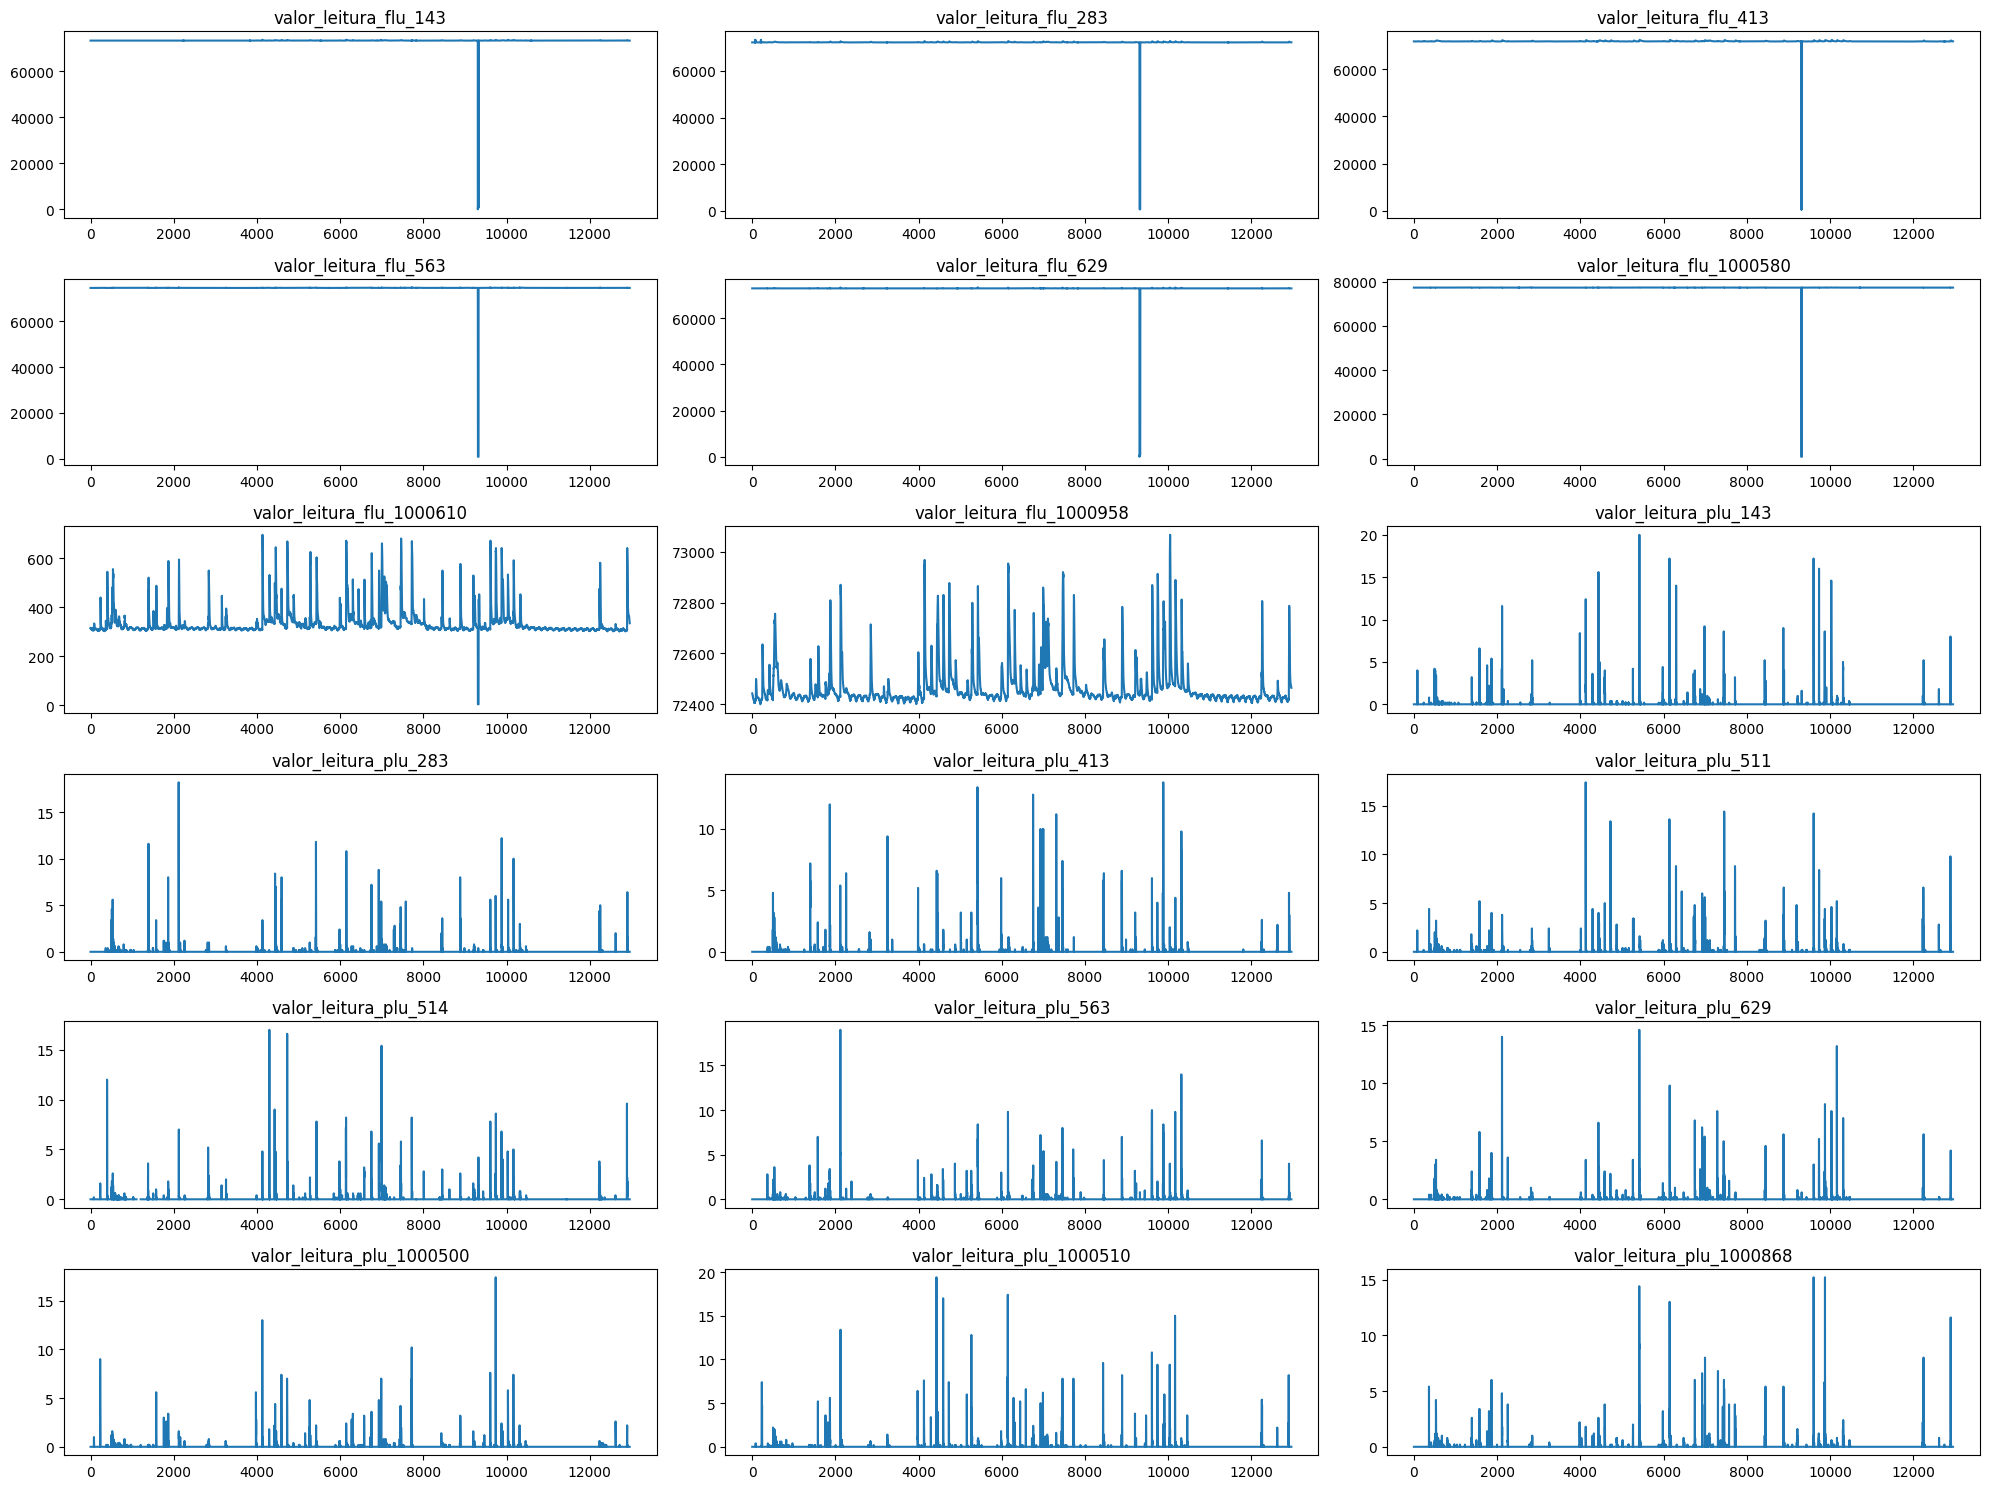

In [93]:
plt.figure(figsize=(20,15))
for i in range(18):
  plt.subplot(6, 3, i+1)
  plt.plot(df_2023[df_2021.columns[1:][i]])
  plt.title(df_2023.columns[1:][i])
  plt.tight_layout()

In [94]:
# Tratar os missing values
#Vamos usar o método de interpolação para preencher valores faltantes em todas as colunas
for column in df_2023:
  df_2023[column].interpolate(method='linear',inplace=True)
  #df_2023[column].fillna(method='ffill',inplace=True)

for column in df_2023:
  df_2023[column].fillna(method='bfill',inplace=True)

for column in df_2023:
  df_2023[column].fillna(method='ffill',inplace=True)

In [95]:
# Reordenar para que todos tenham a mesma ordem de colunas
df_2023 = df_2023[list(df_2018.columns)]

# Remoção da estação 143

(pois visualmente possui problemas severos em 2021 e 2022)

In [ ]:
df_2018 = df_2018.drop(columns=['valor_leitura_flu_143'])
df_2019 = df_2019.drop(columns=['valor_leitura_flu_143'])
df_2020 = df_2020.drop(columns=['valor_leitura_flu_143'])
df_2021 = df_2021.drop(columns=['valor_leitura_flu_143'])
df_2022 = df_2022.drop(columns=['valor_leitura_flu_143'])
df_2023 = df_2023.drop(columns=['valor_leitura_flu_143'])

# Salvando todos os dataframes

In [96]:
df_2018.to_csv('data/series_temporais_tratadas_2018.csv')
df_2019.to_csv('data/series_temporais_tratadas_2019.csv')
df_2020.to_csv('data/series_temporais_tratadas_2020.csv')
df_2021.to_csv('data/series_temporais_tratadas_2021.csv')
df_2022.to_csv('data/series_temporais_tratadas_2022.csv')
df_2023.to_csv('data/series_temporais_tratadas_2023.csv')

In [97]:
df_2018 = pd.read_csv ('data/series_temporais_tratadas_2018.csv').drop(['Unnamed: 0'],axis=1)
df_2019 = pd.read_csv ('data/series_temporais_tratadas_2019.csv').drop(['Unnamed: 0'],axis=1)
df_2020 = pd.read_csv ('data/series_temporais_tratadas_2020.csv').drop(['Unnamed: 0'],axis=1)
df_2021 = pd.read_csv ('data/series_temporais_tratadas_2021.csv').drop(['Unnamed: 0'],axis=1)
df_2022 = pd.read_csv ('data/series_temporais_tratadas_2022.csv').drop(['Unnamed: 0'],axis=1)
df_2023 = pd.read_csv ('data/series_temporais_tratadas_2023.csv').drop(['Unnamed: 0'],axis=1)

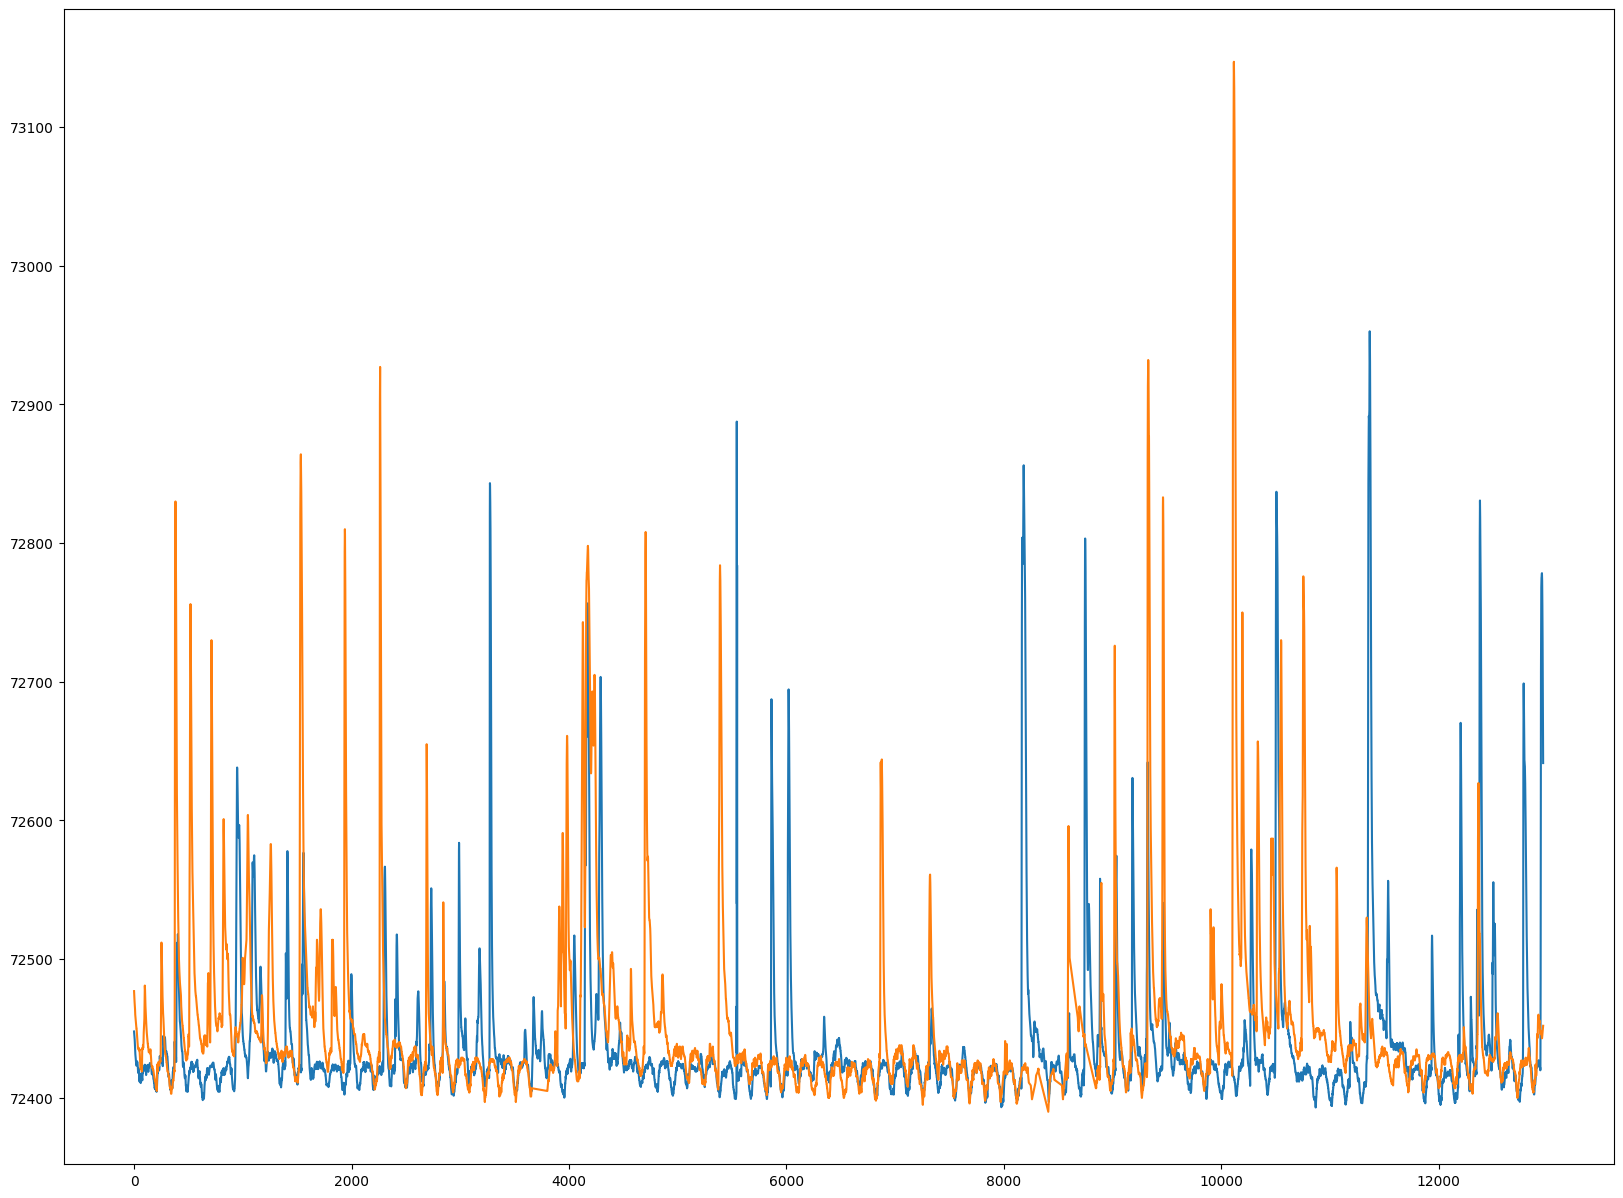

In [98]:
plt.figure(figsize=(20,15))
plt.plot(df_2018['valor_leitura_flu_1000958'])
plt.plot(df_2022['valor_leitura_flu_1000958'])

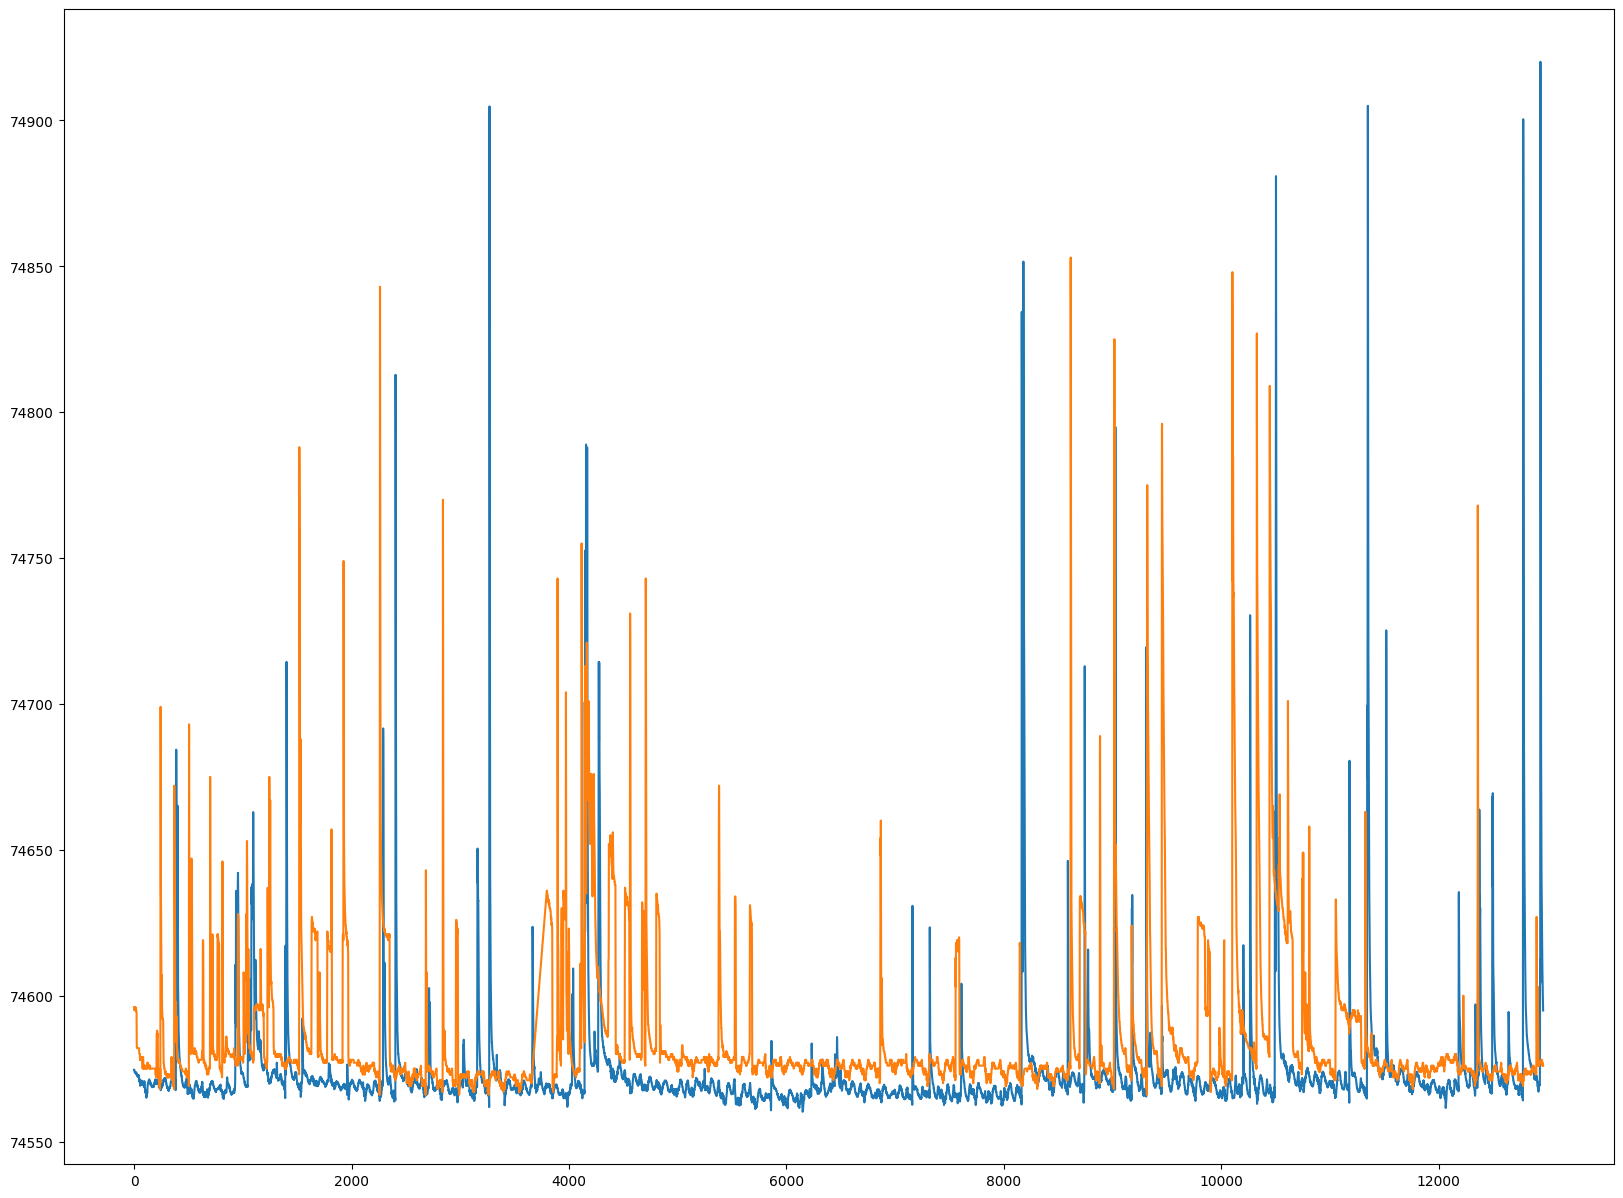

In [99]:
plt.figure(figsize=(20,15))
plt.plot(df_2018['valor_leitura_flu_563'])
plt.plot(df_2022['valor_leitura_flu_563'])

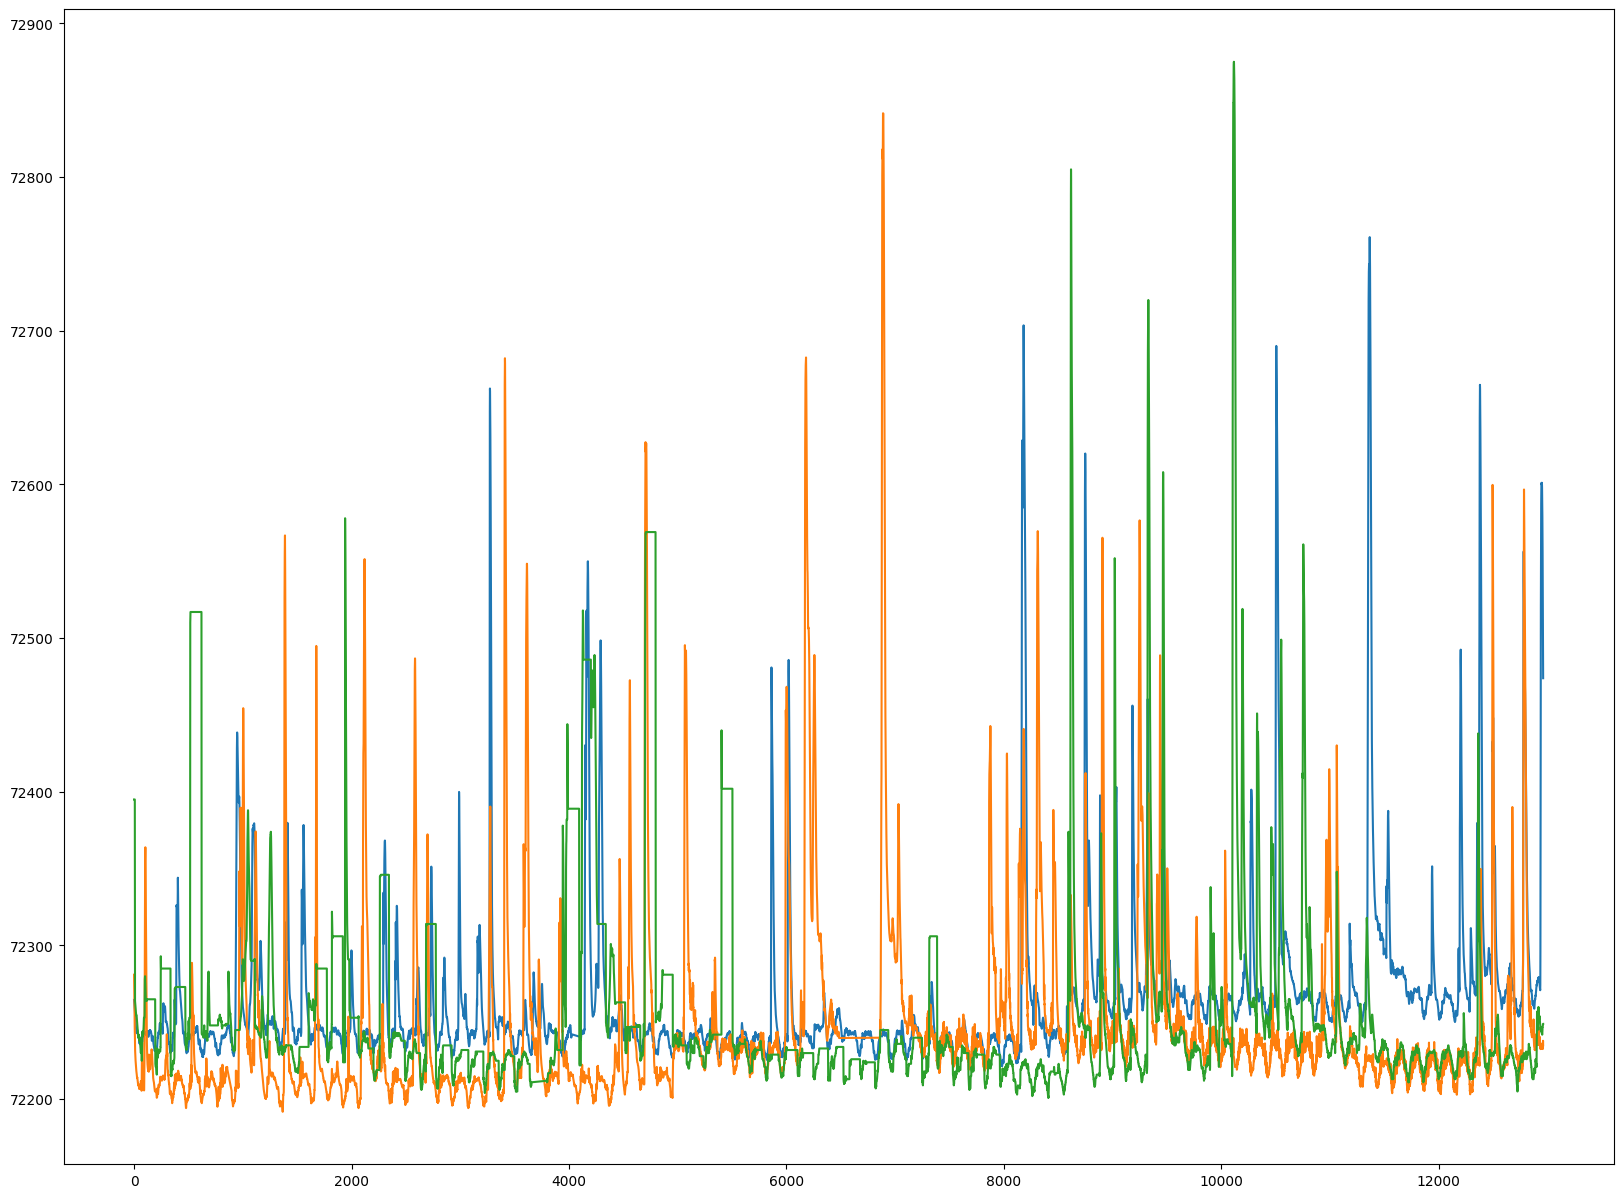

In [100]:
plt.figure(figsize=(20,15))
plt.plot(df_2018['valor_leitura_flu_283'])
plt.plot(df_2021['valor_leitura_flu_283'])
plt.plot(df_2022['valor_leitura_flu_283'])

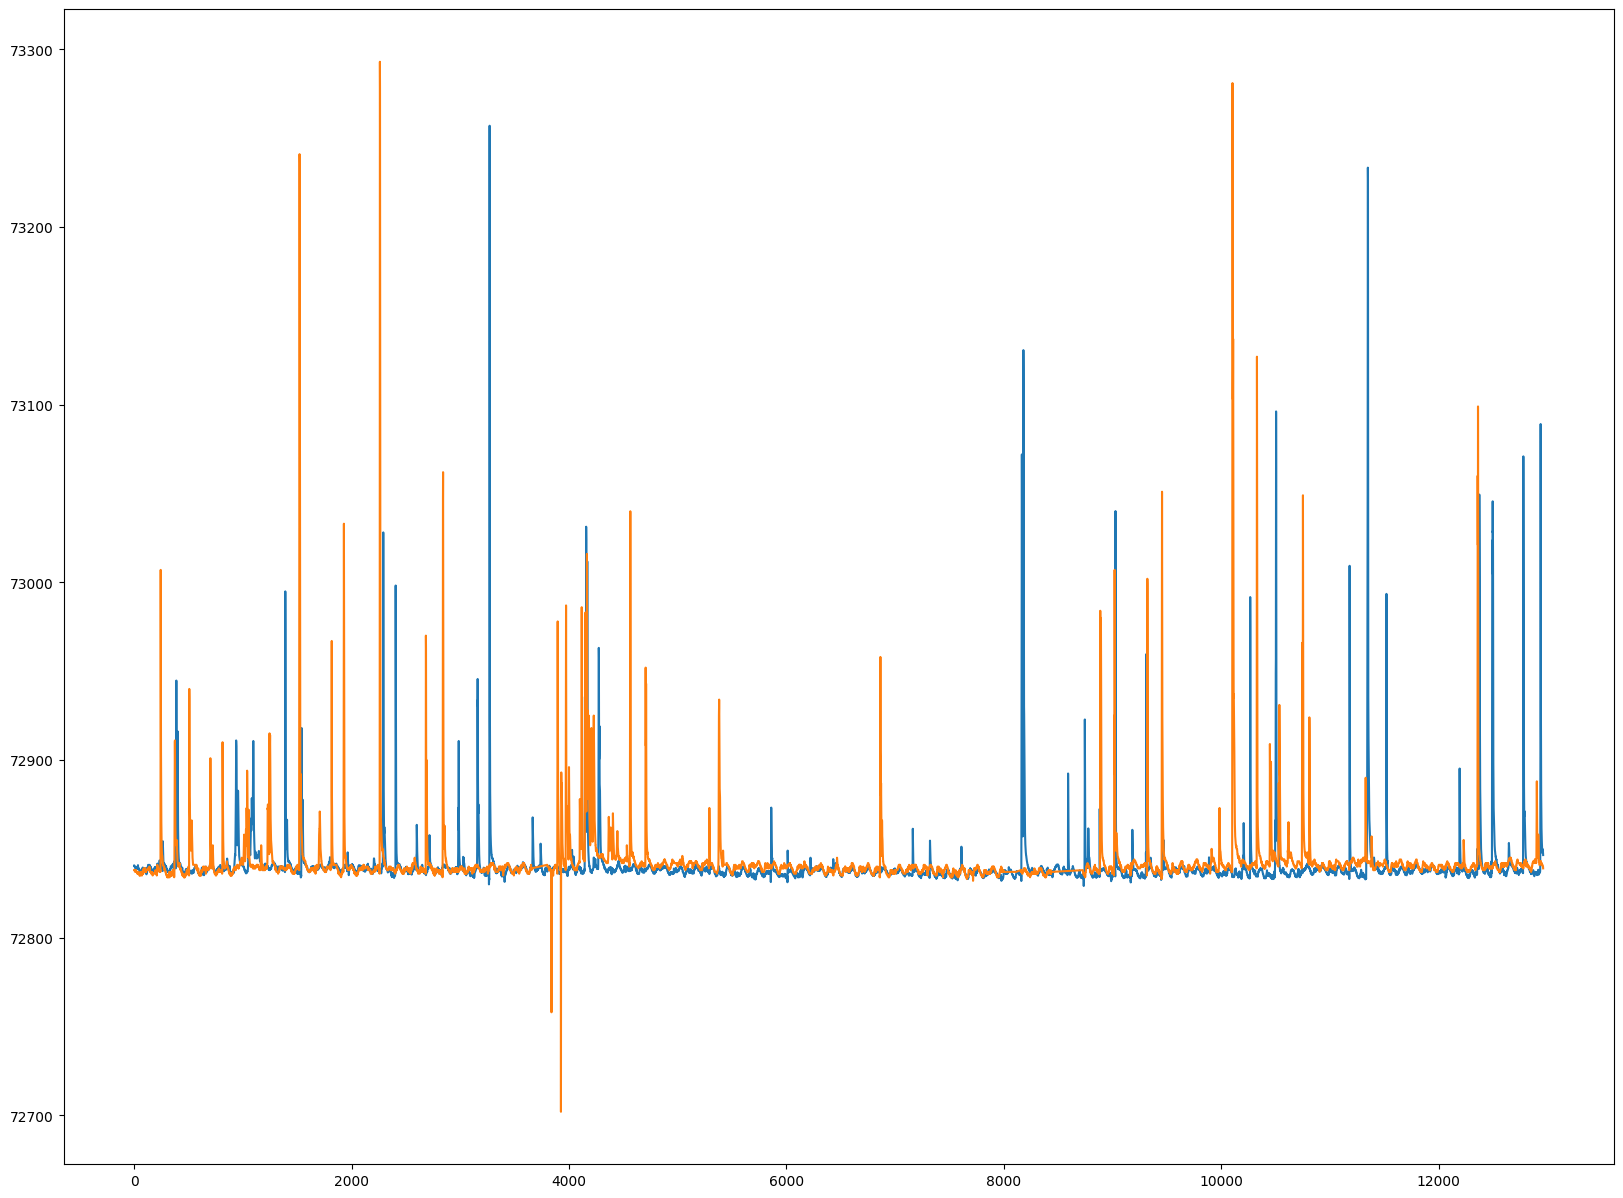

In [101]:
plt.figure(figsize=(20,15))
plt.plot(df_2018['valor_leitura_flu_629'])
plt.plot(df_2022['valor_leitura_flu_629'])

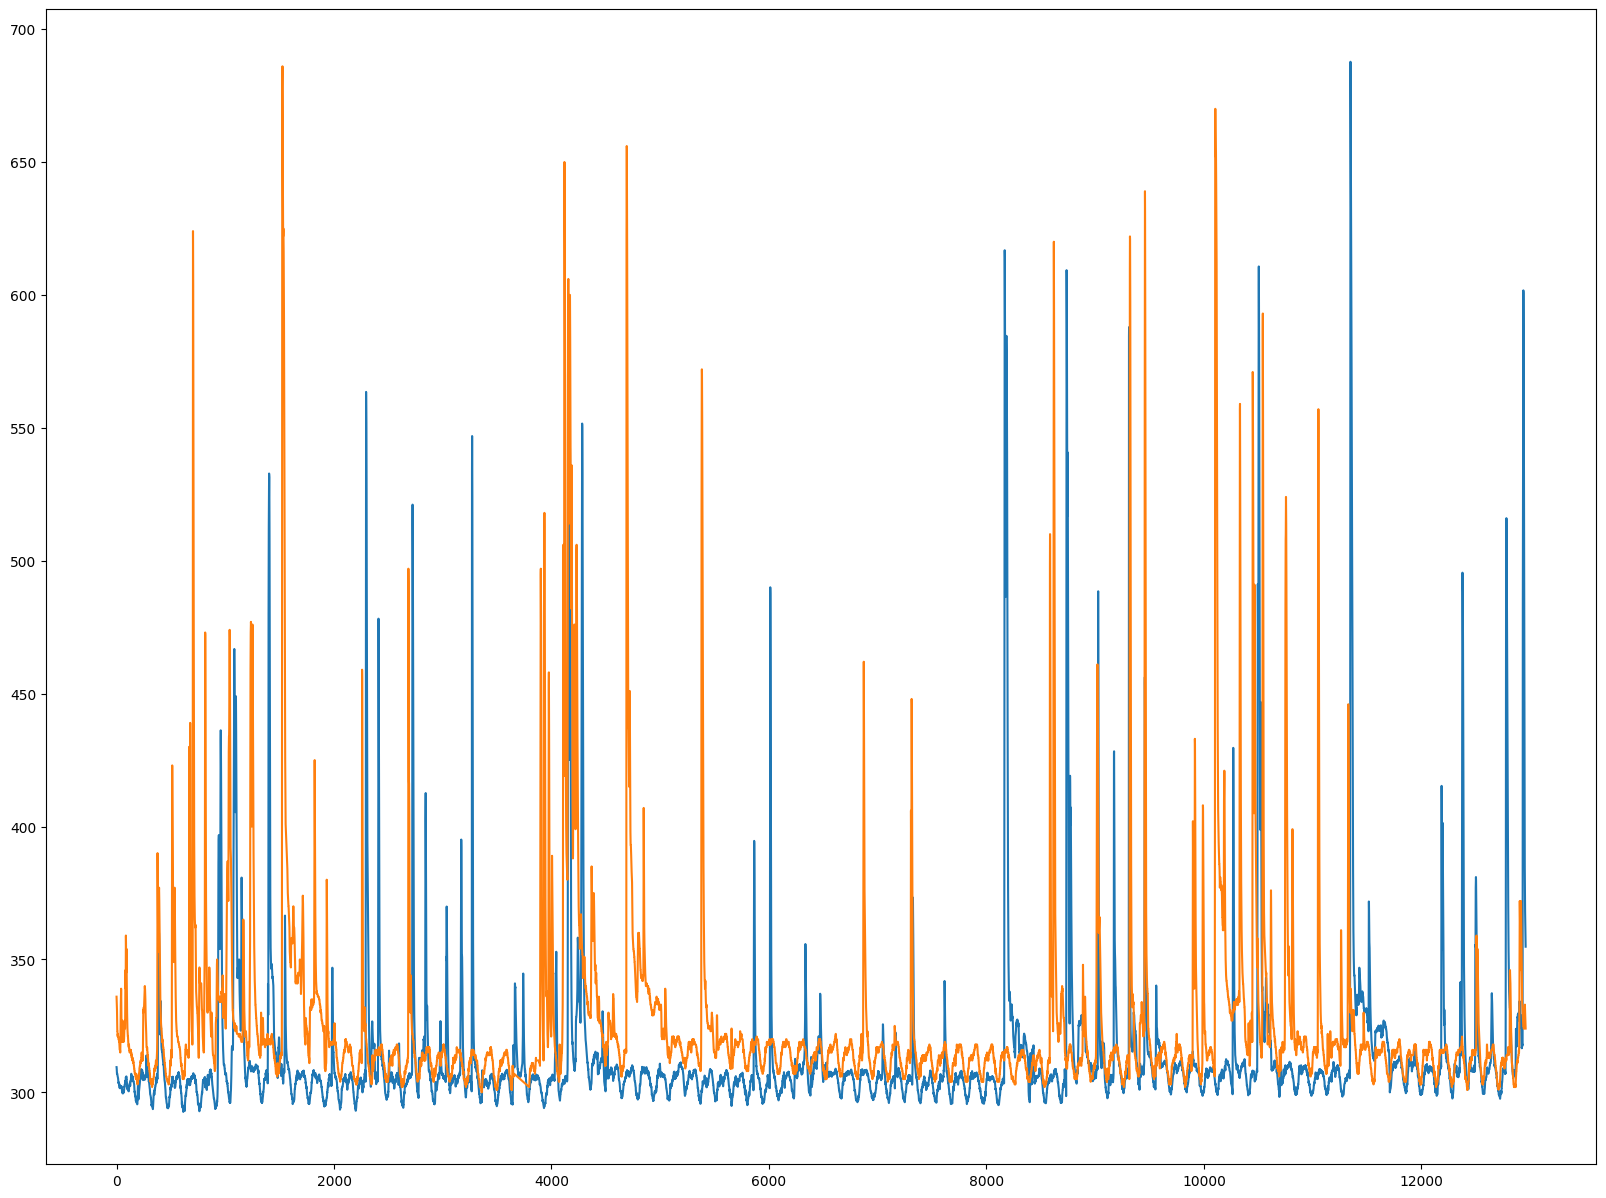

In [102]:
plt.figure(figsize=(20,15))
plt.plot(df_2018['valor_leitura_flu_1000610'])
plt.plot(df_2022['valor_leitura_flu_1000610'])

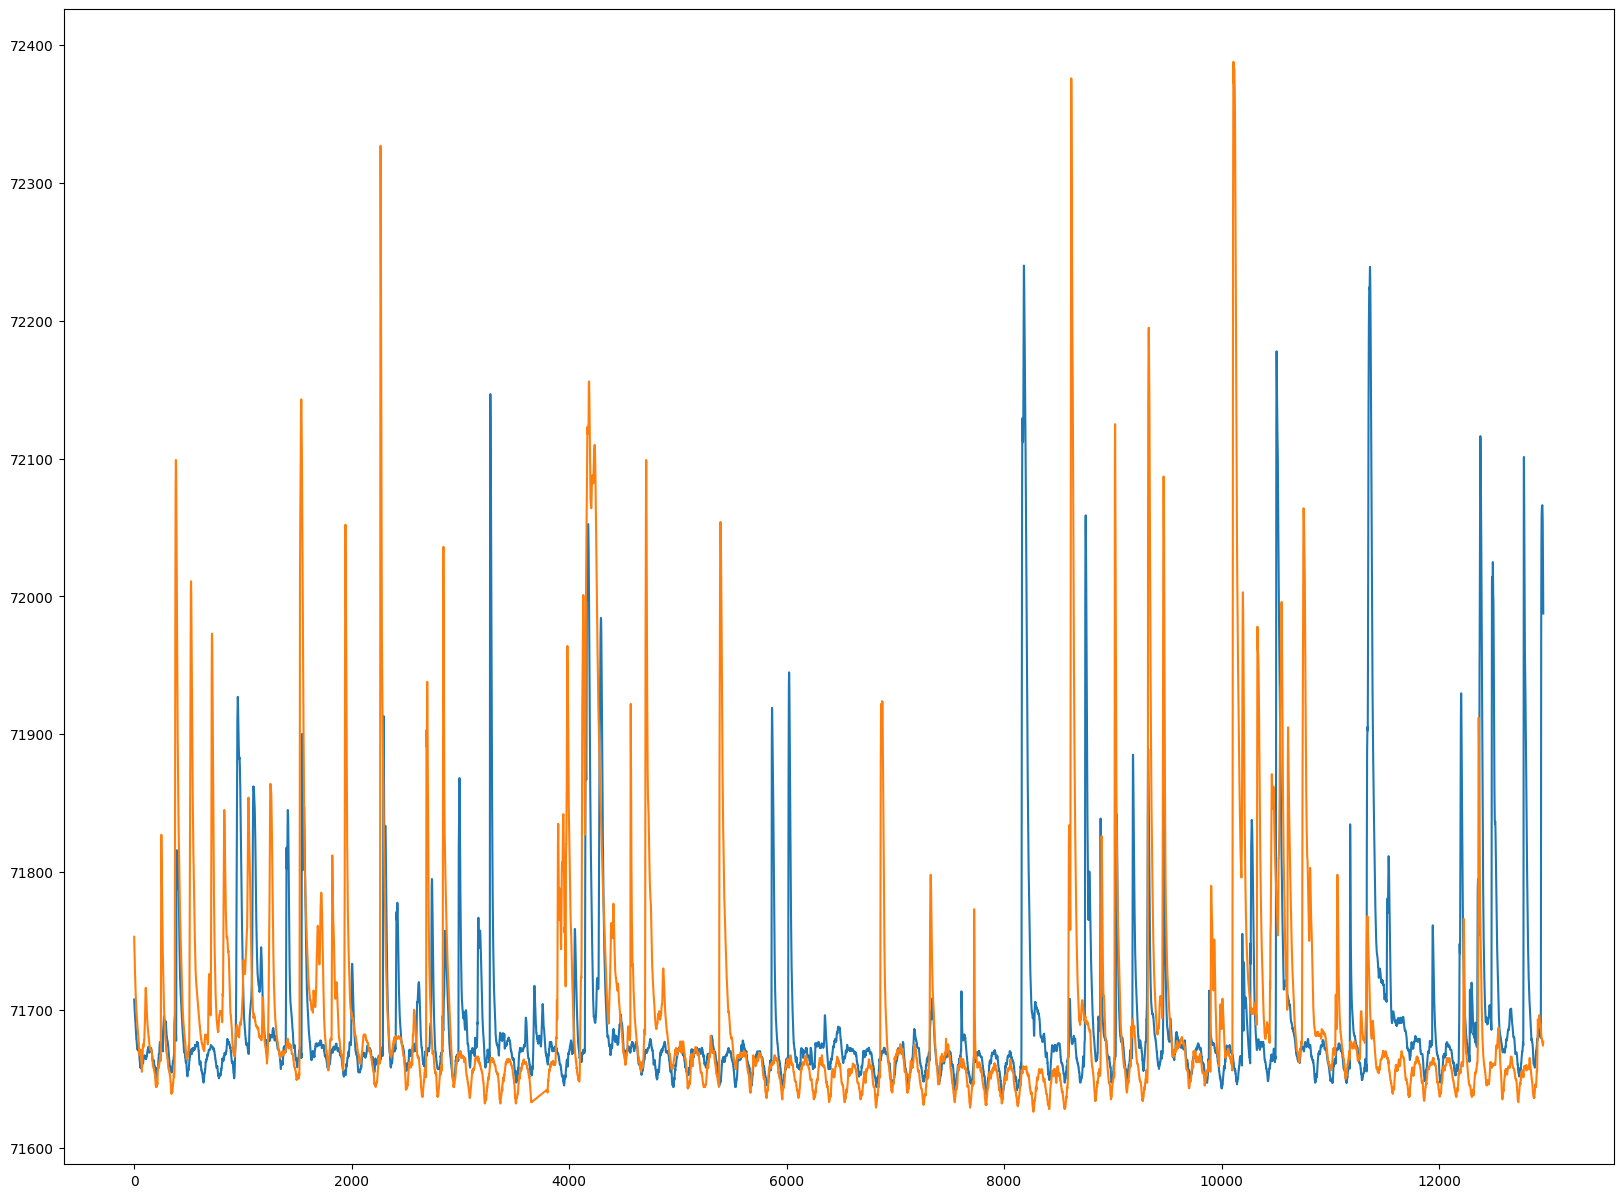

In [103]:
plt.figure(figsize=(20,15))
plt.plot(df_2018['valor_leitura_flu_413'])
plt.plot(df_2022['valor_leitura_flu_413'])